In [2]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

Loading required package: Rsamtools

Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: Biostrings



Warning message:
“no DISPLAY variable so Tk is not available”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7.1. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtplyr

Loading required package: profvis

Loading required package: ggforce

Loading required package: pracma


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:Hmisc’:

    ceil


Loading required package: rstatix


Attaching package: ‘rstatix’


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggpubr

Loading required package: jsonlite


Attaching package: ‘jsonlite’


The following object is masked from ‘package:R.utils’:

    validate


The following object is masked from ‘package:purrr’:

    flatten


Loading

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls Internal controls       IPA samples       Other molds 
          "white"         "#7CA2C2"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



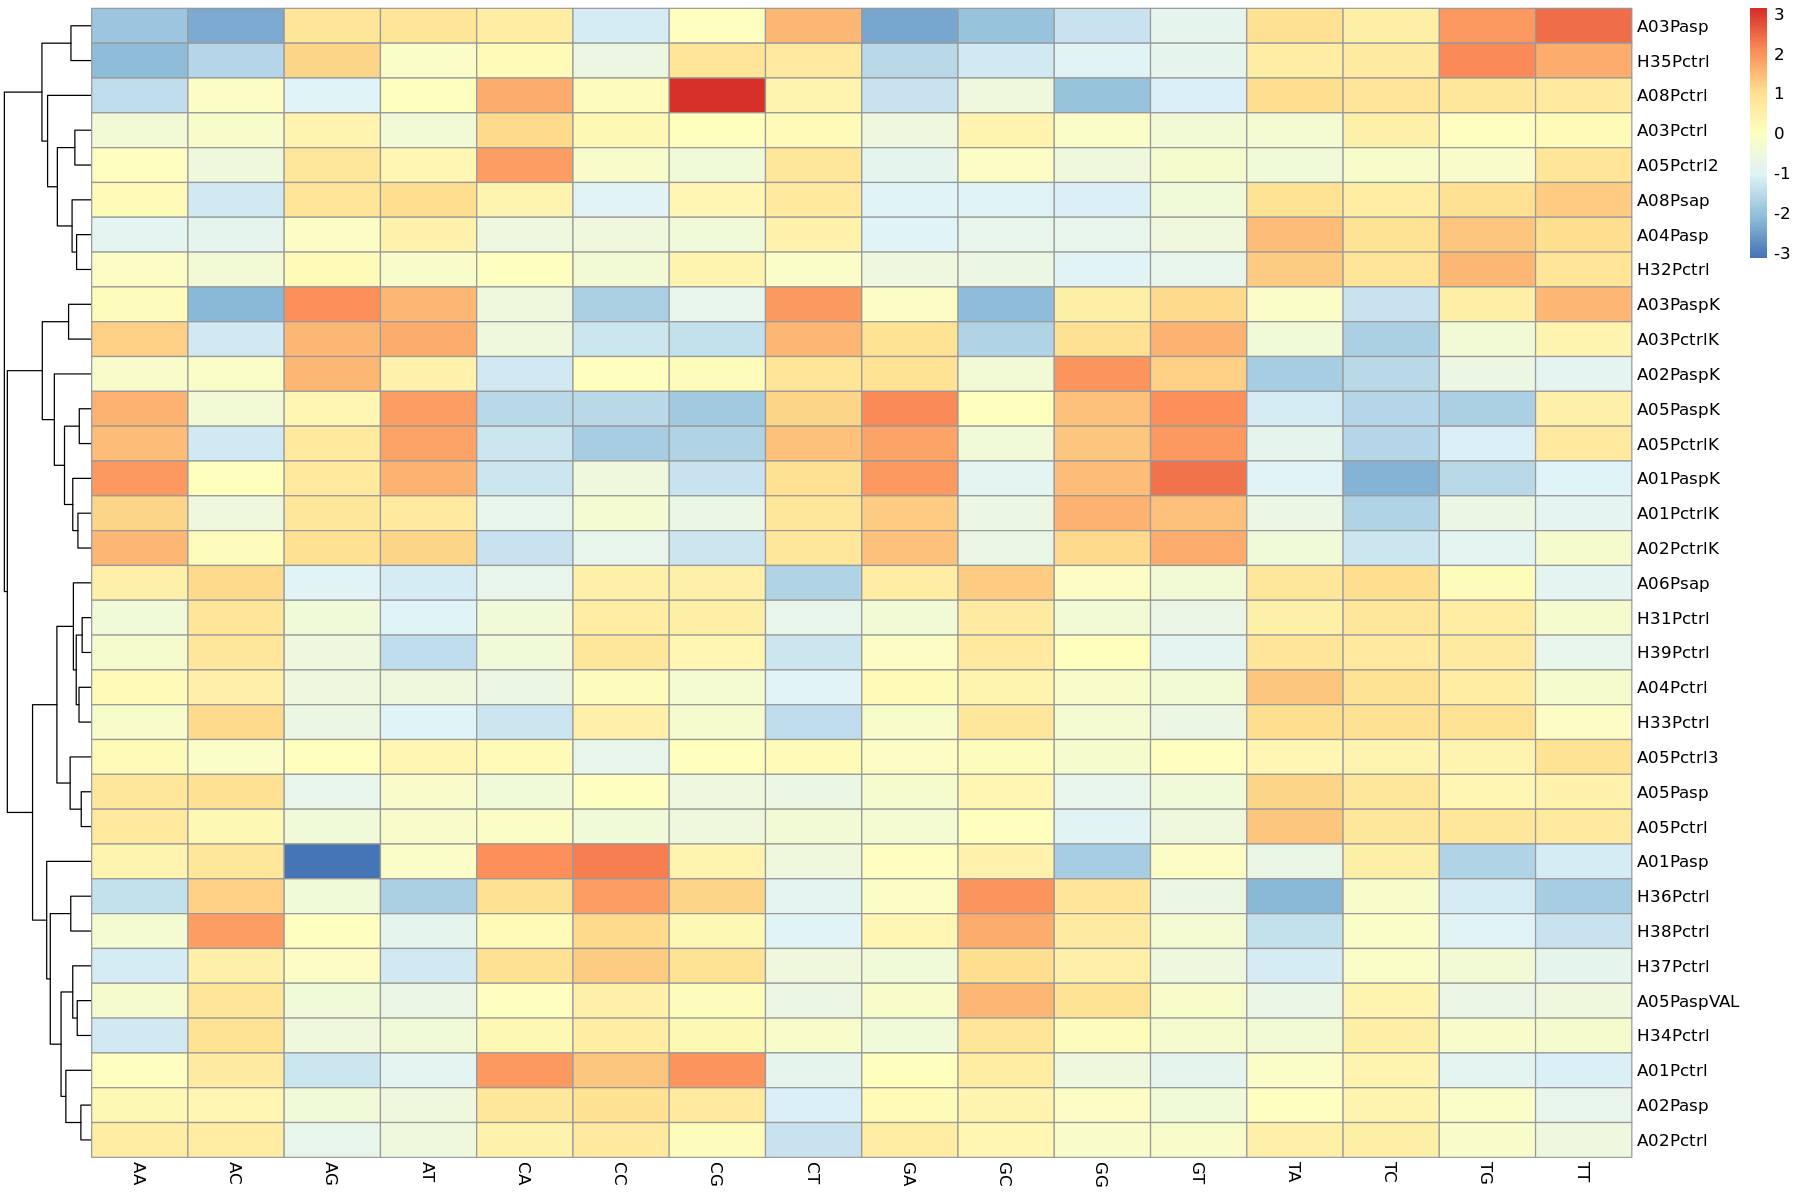

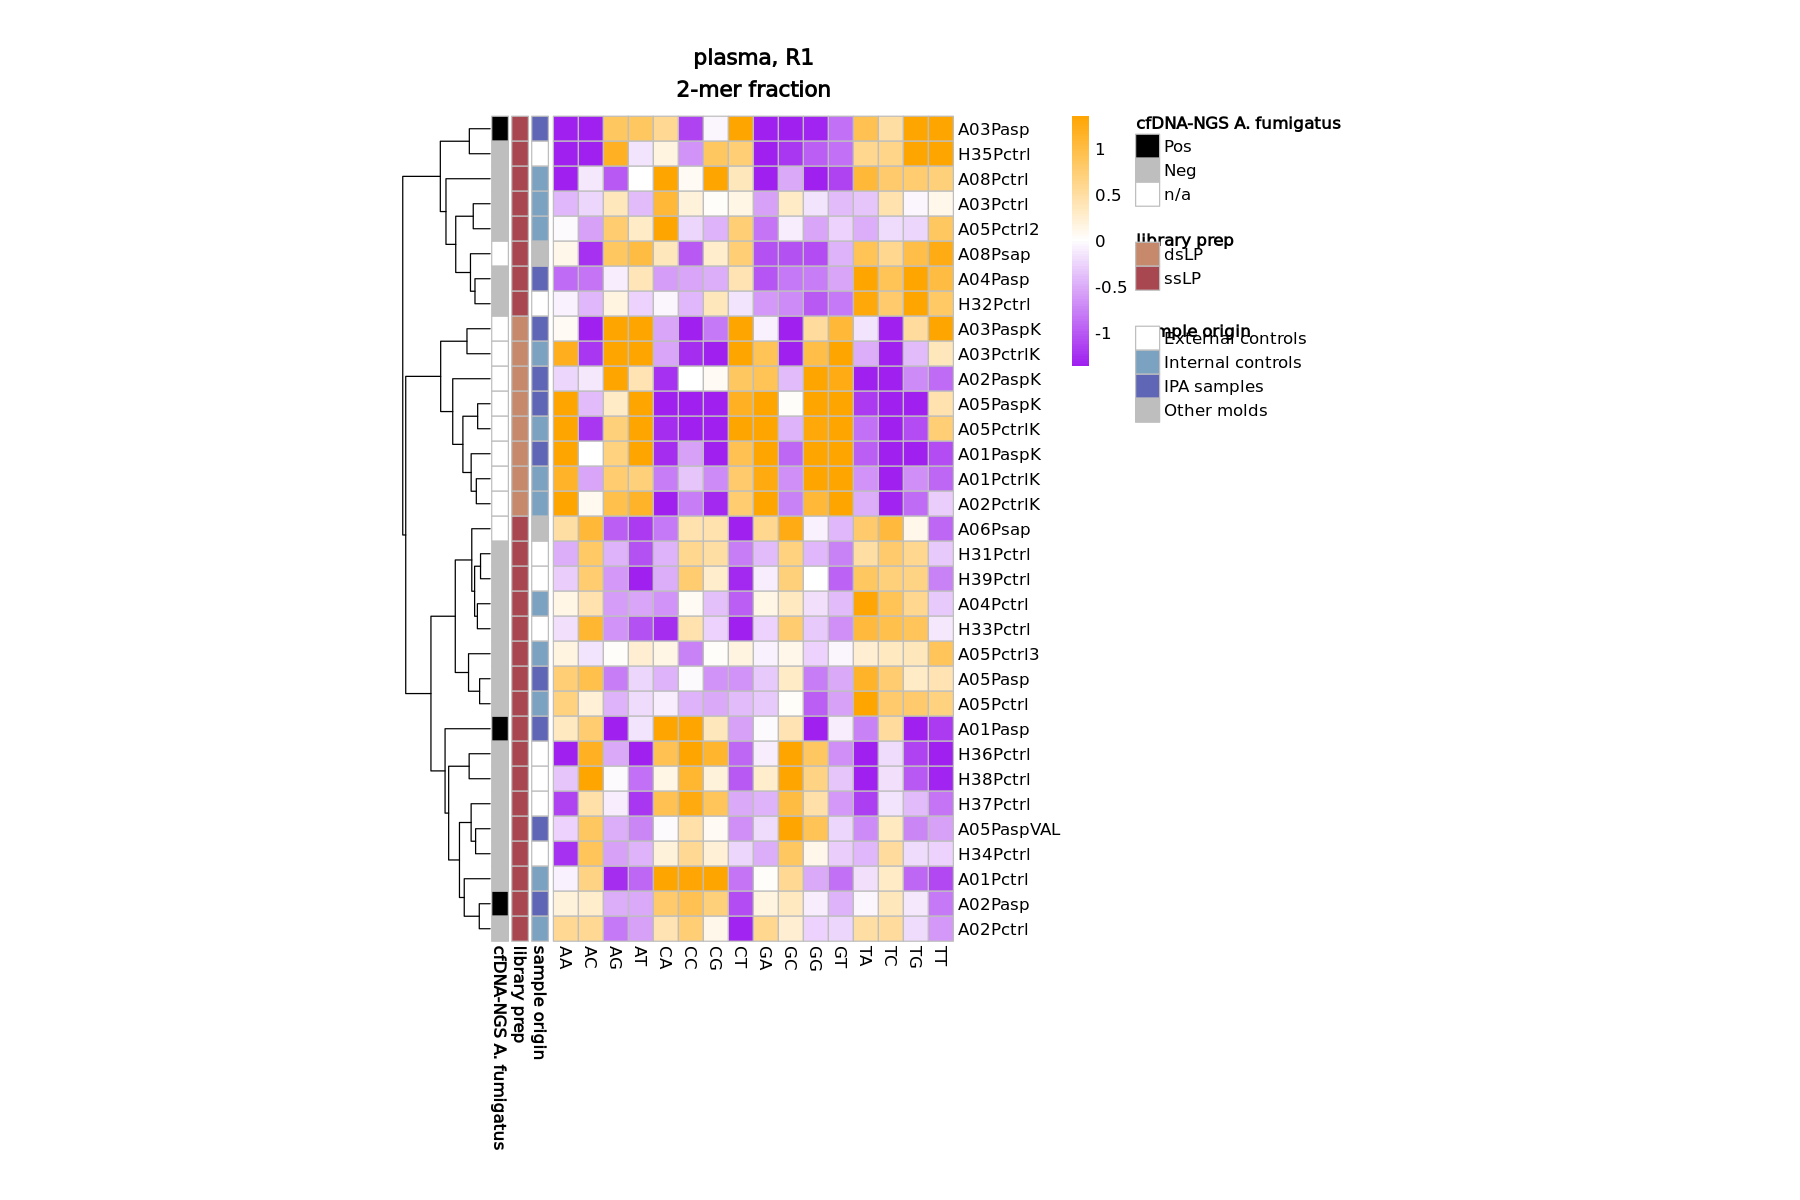

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls Internal controls       IPA samples       Other molds 
          "white"         "#7CA2C2"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



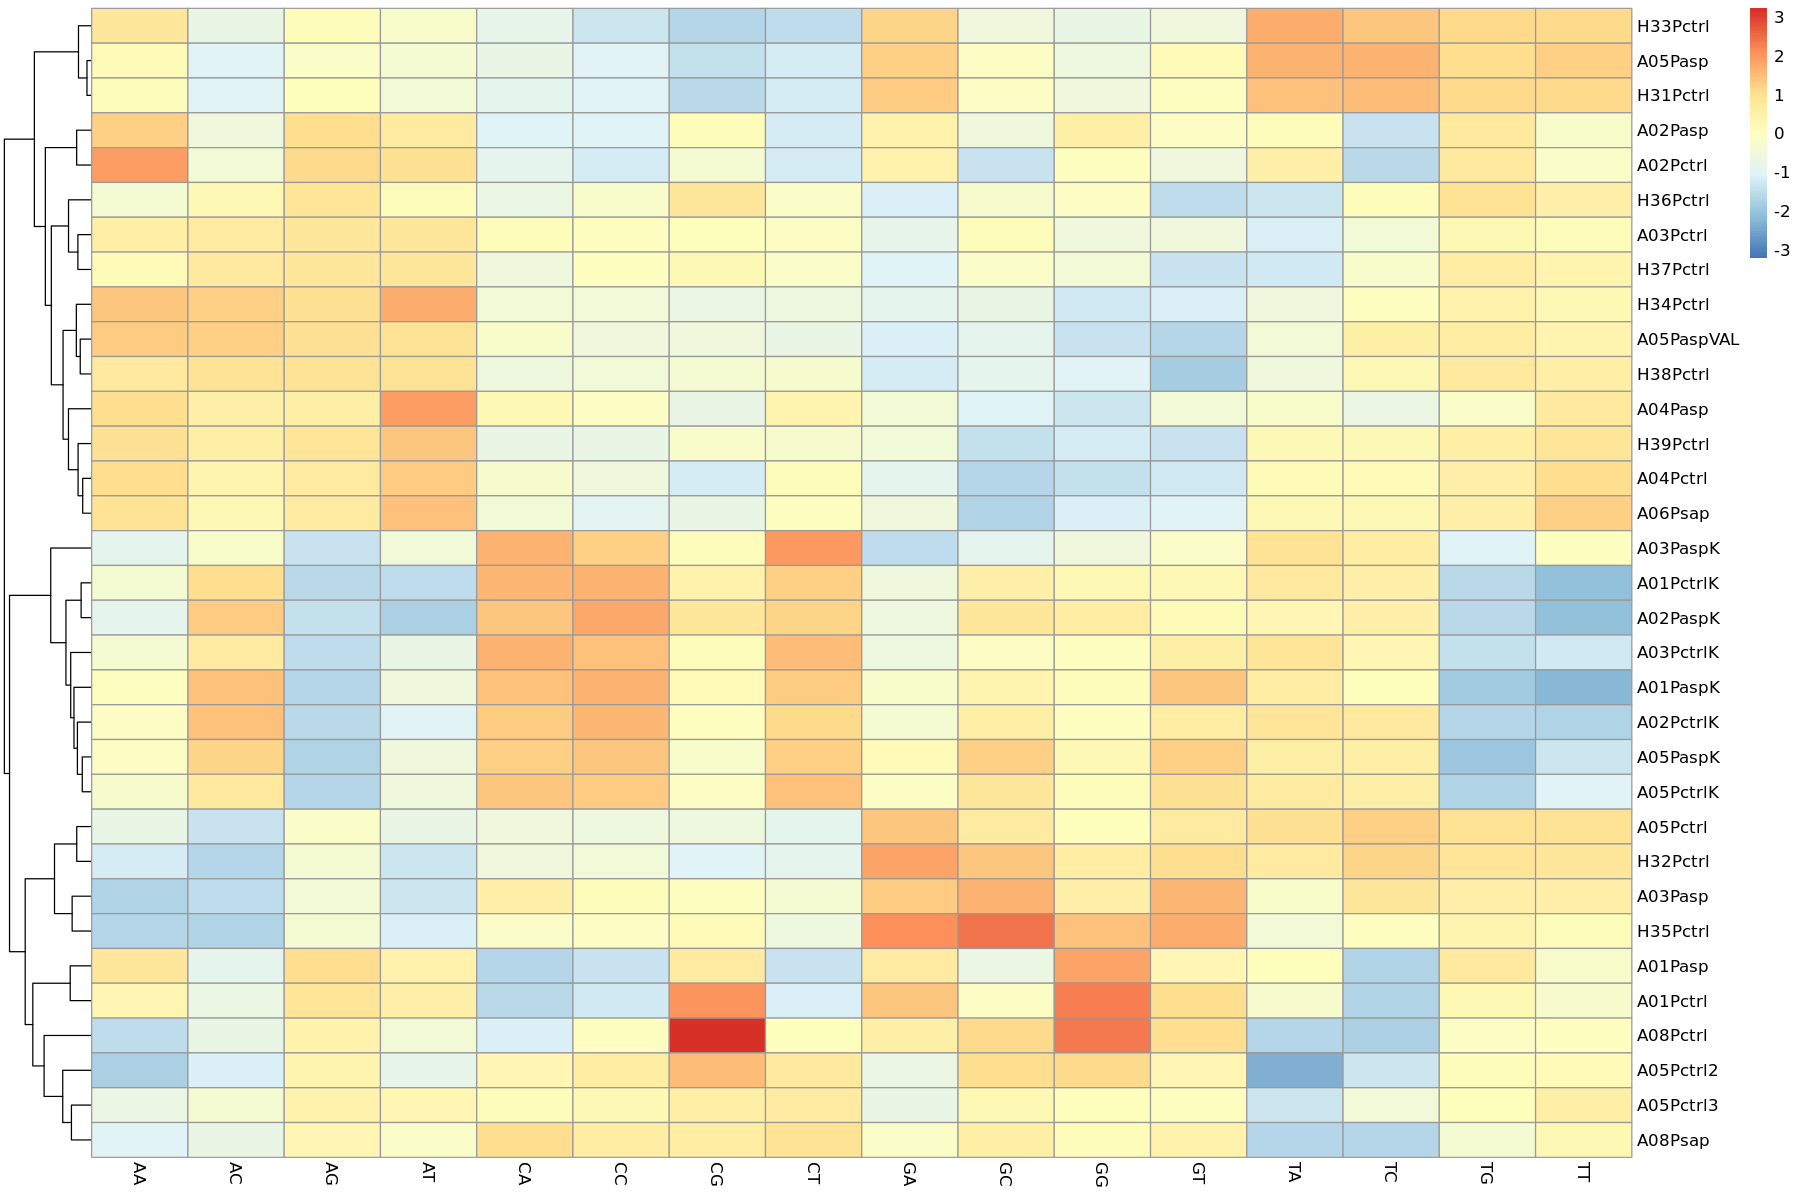

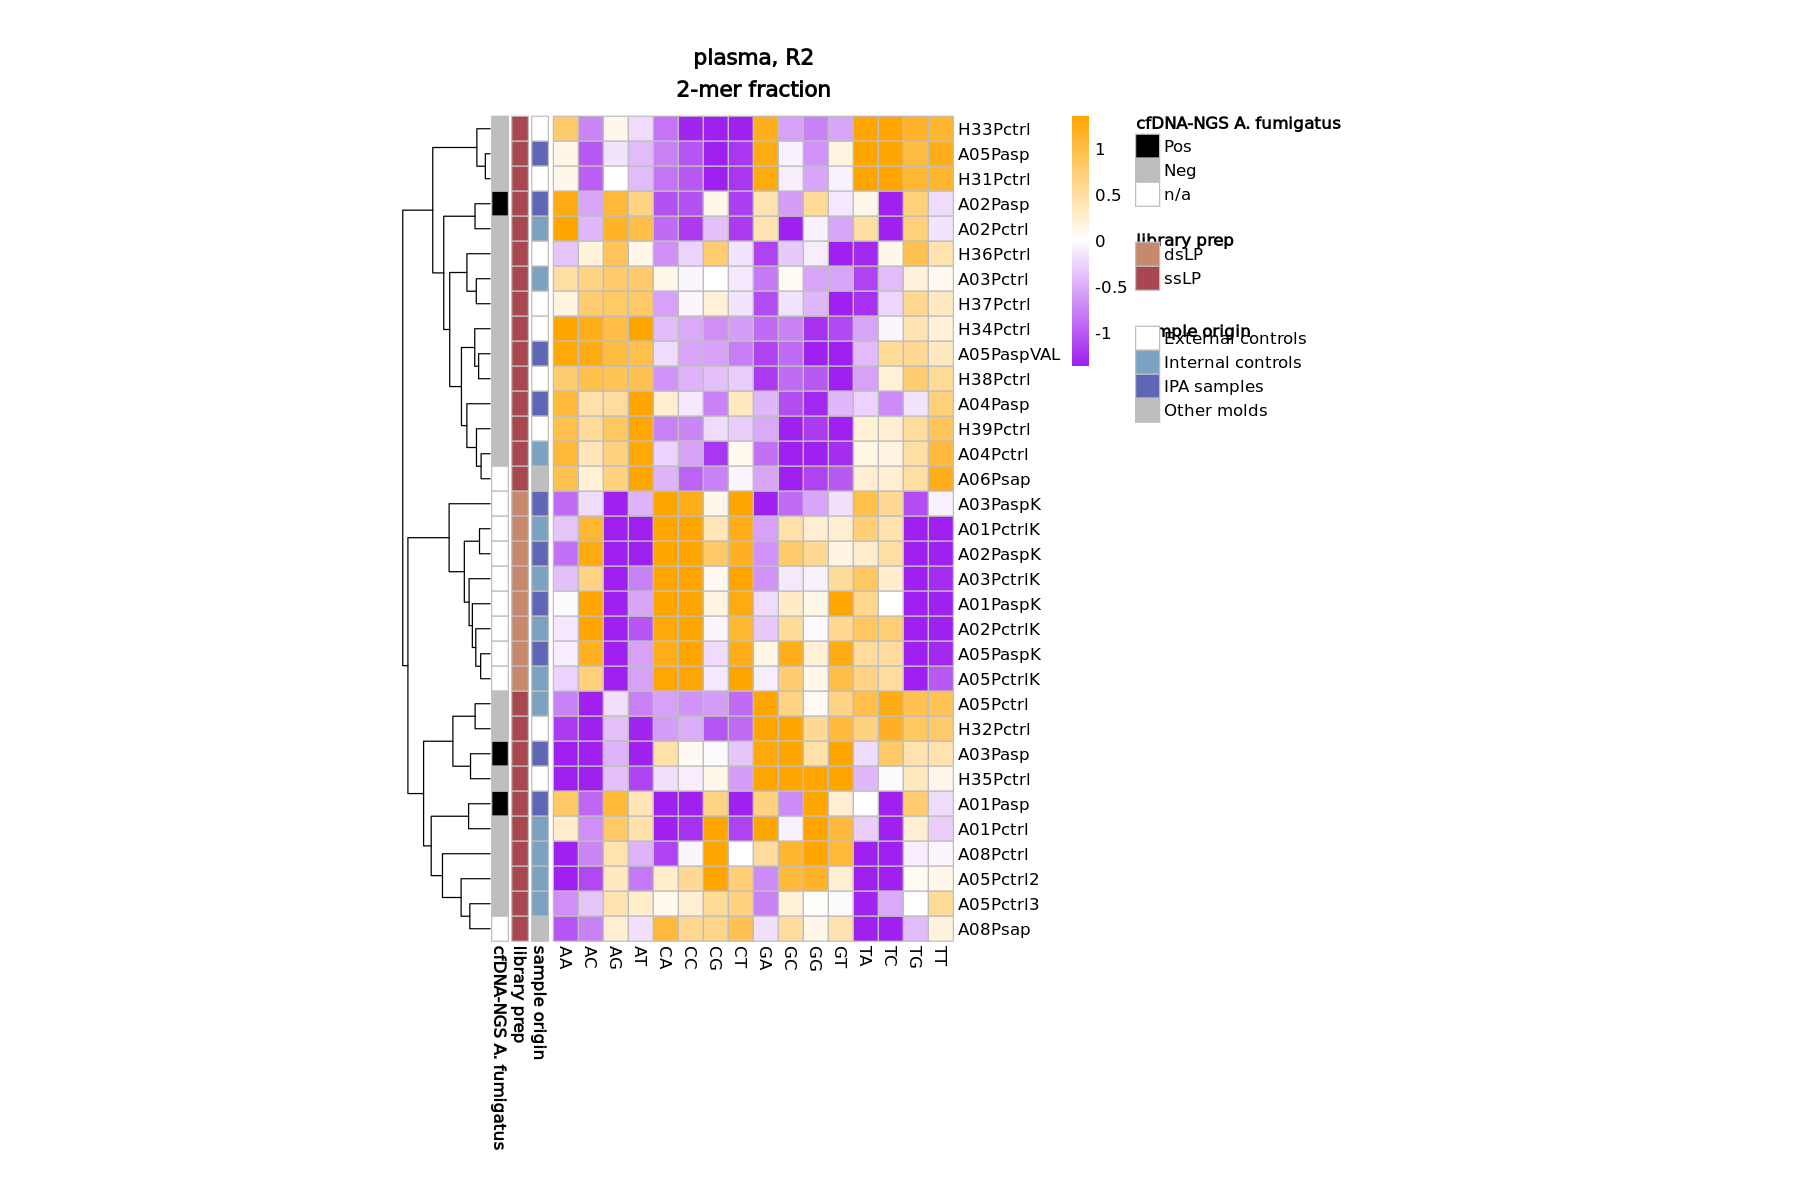

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls       IPA samples       Other molds 
          "white"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



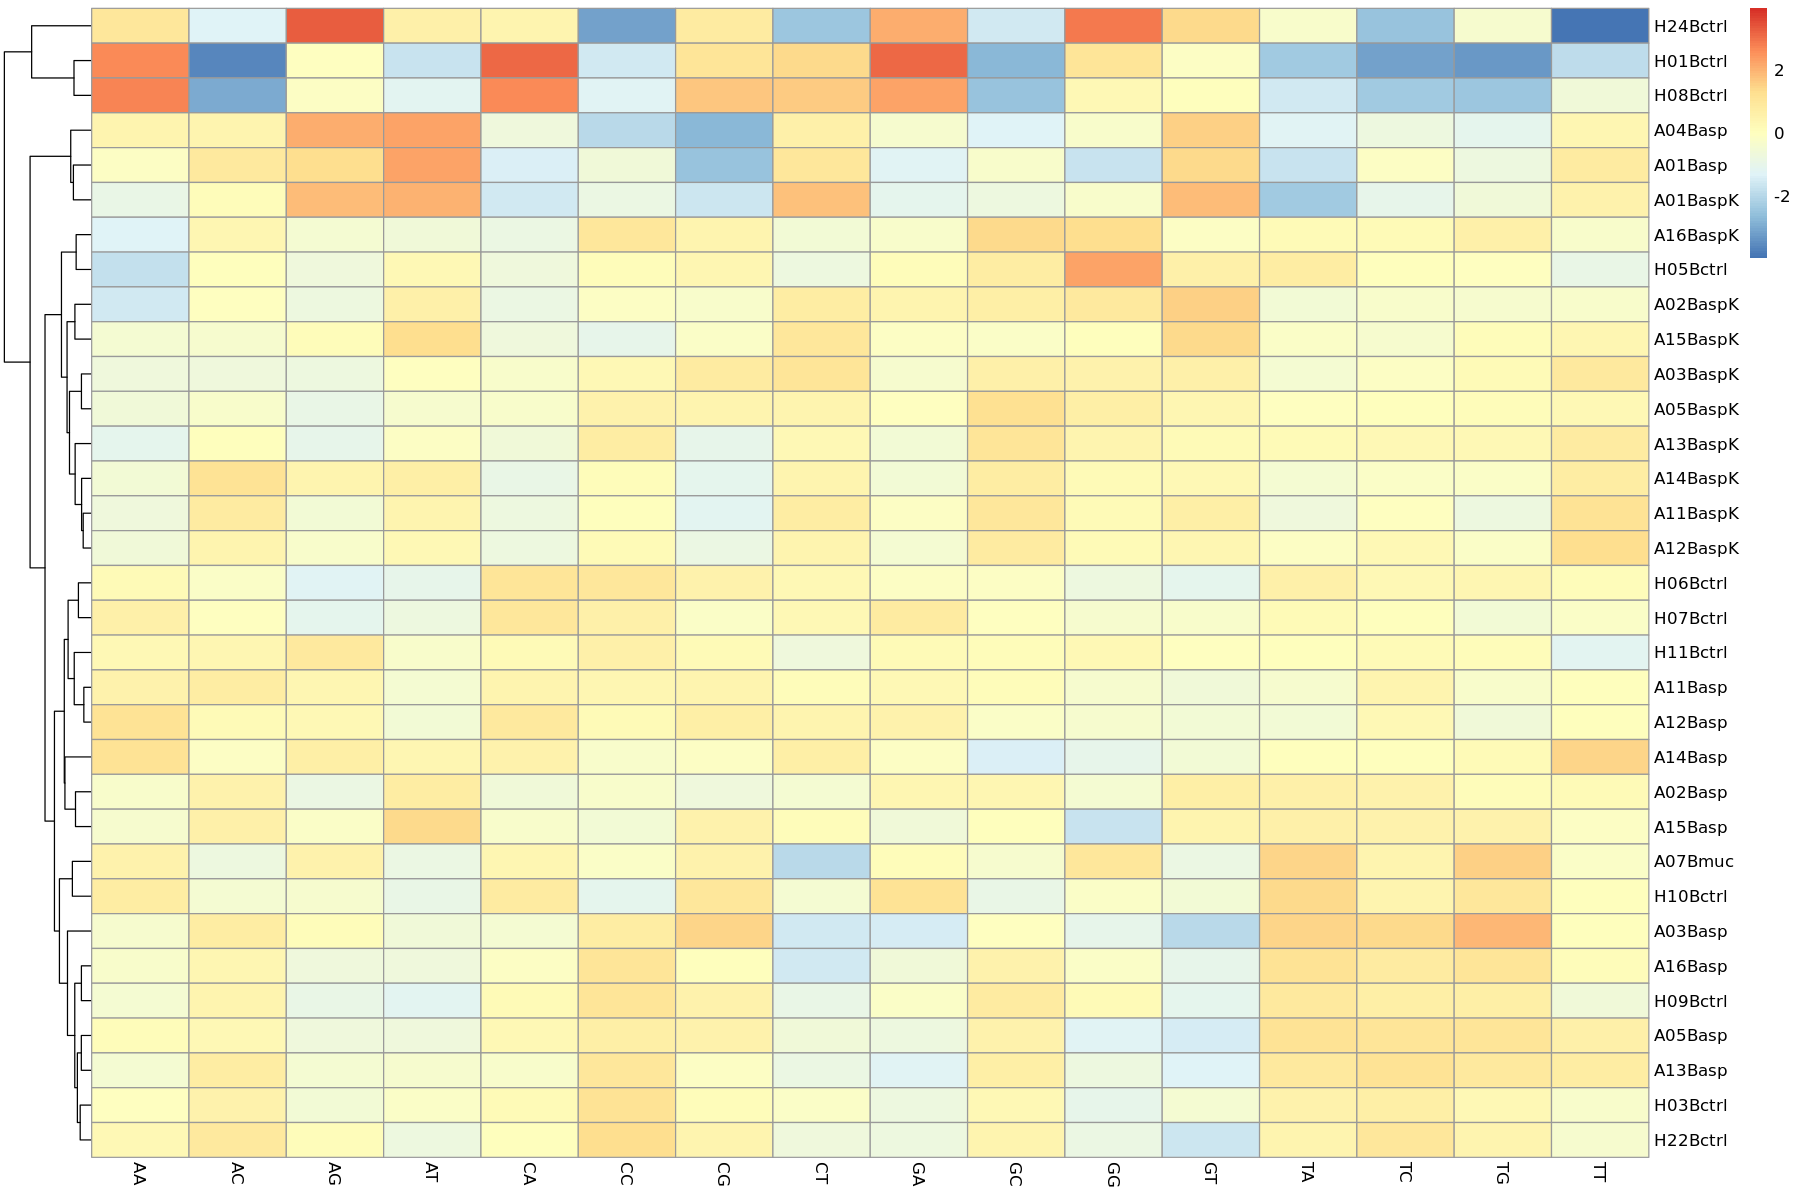

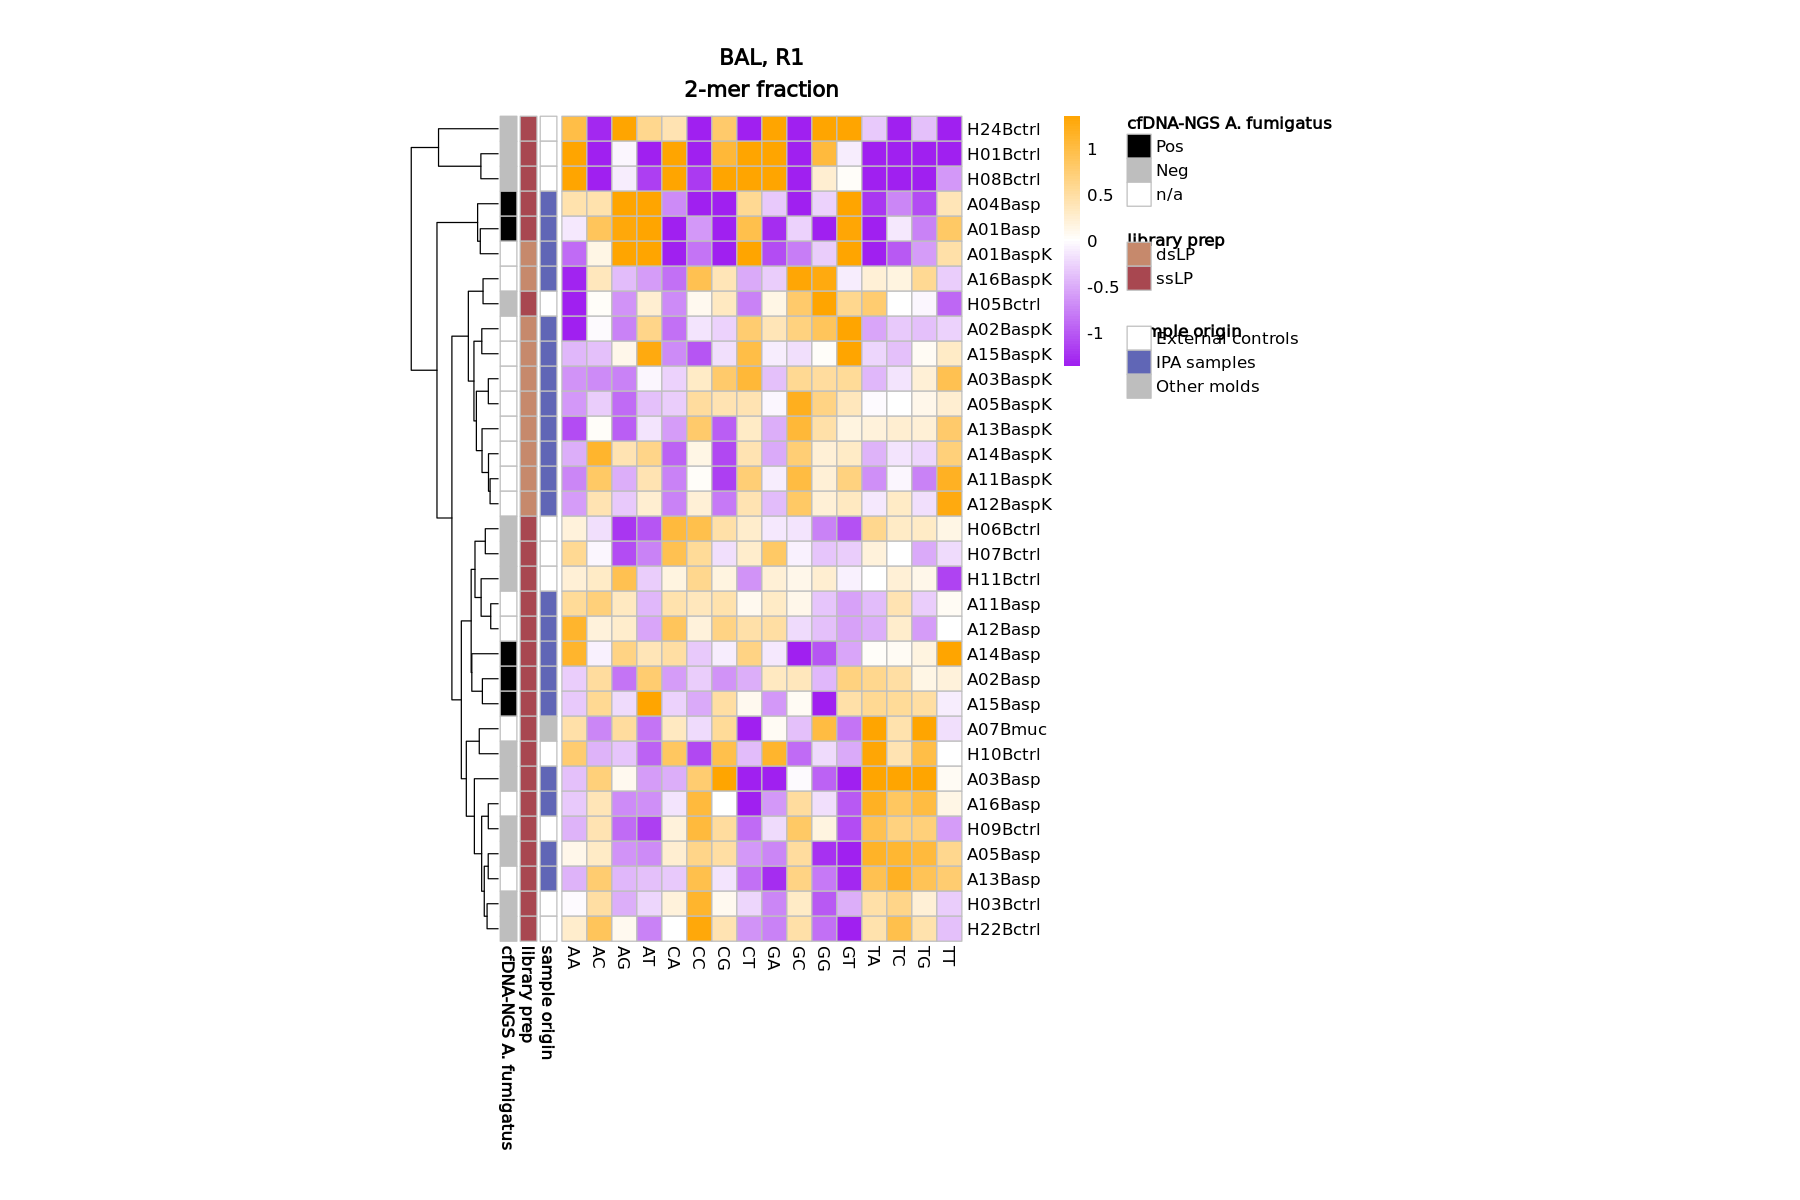

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls       IPA samples       Other molds 
          "white"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



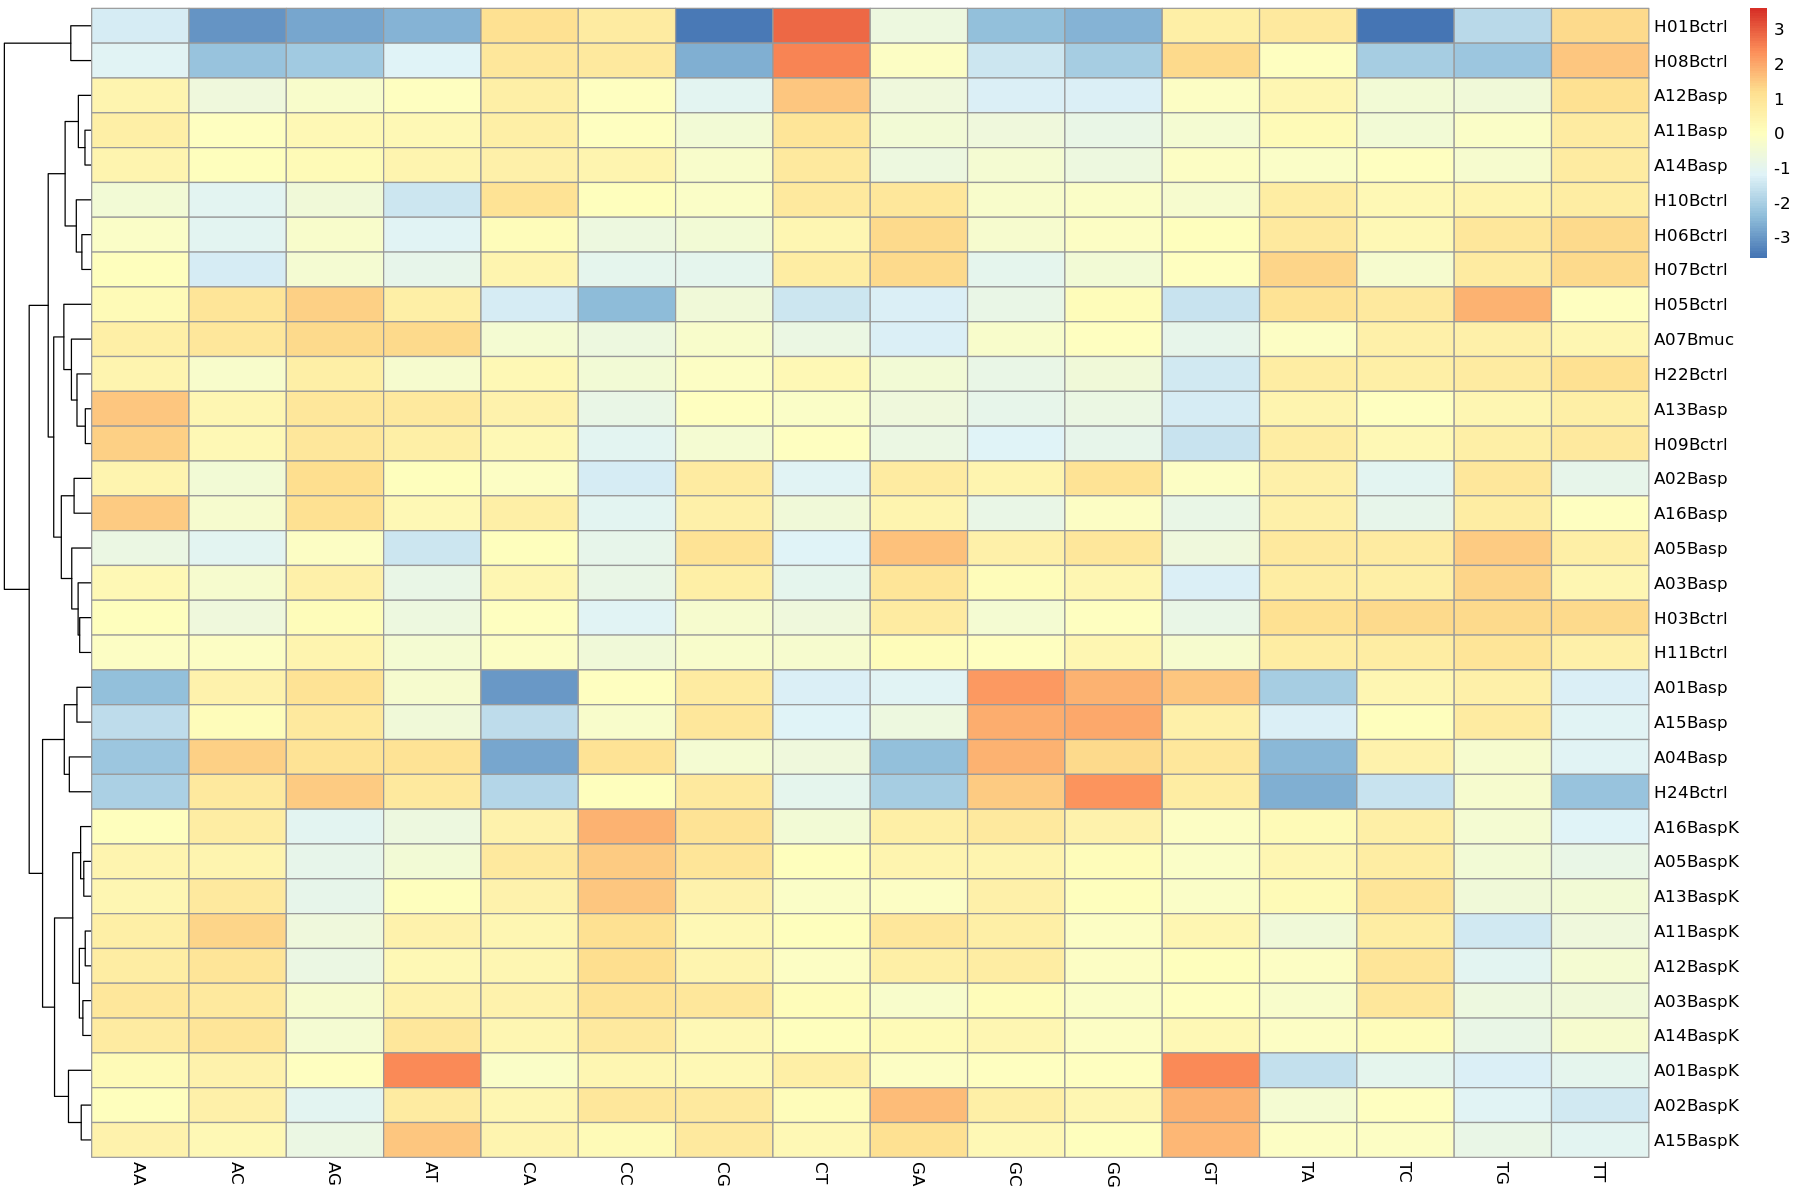

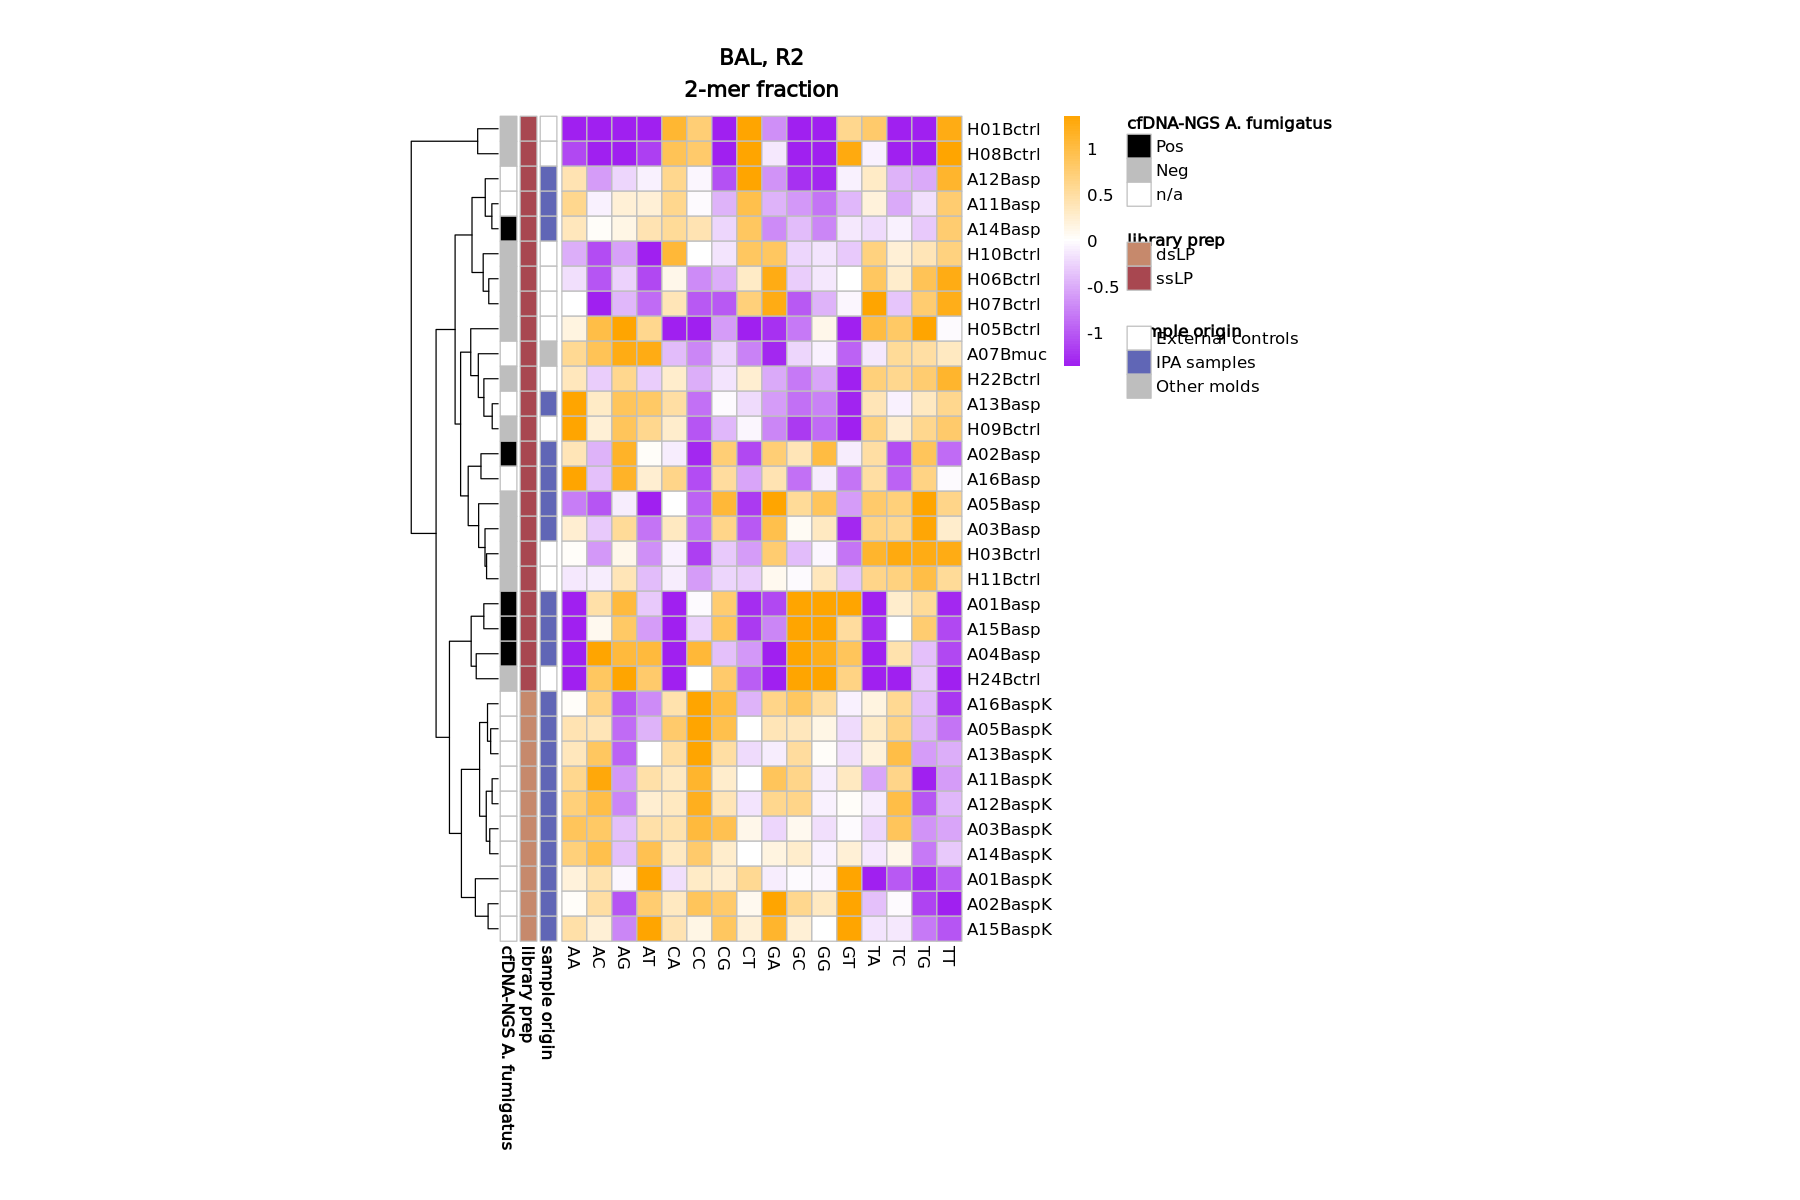

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls Internal controls       IPA samples       Other molds 
          "white"         "#7CA2C2"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



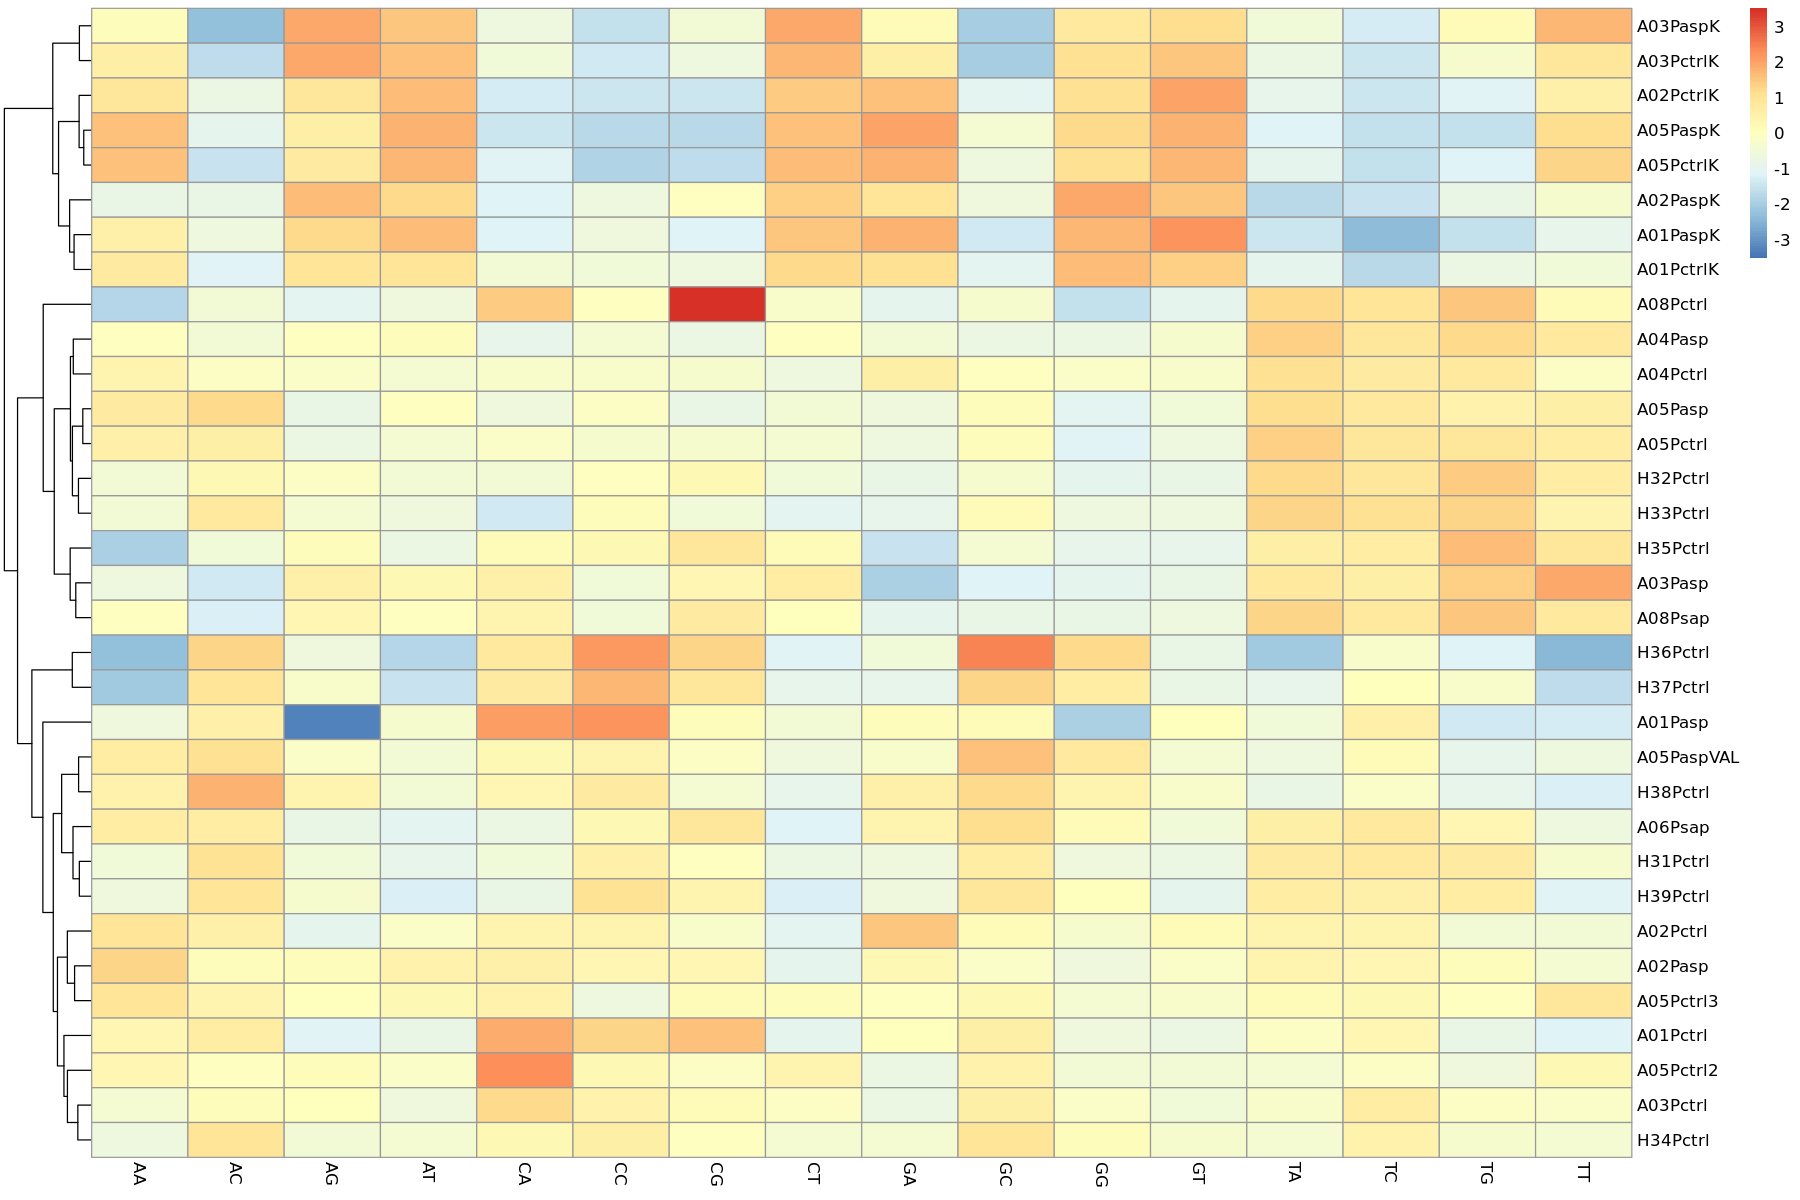

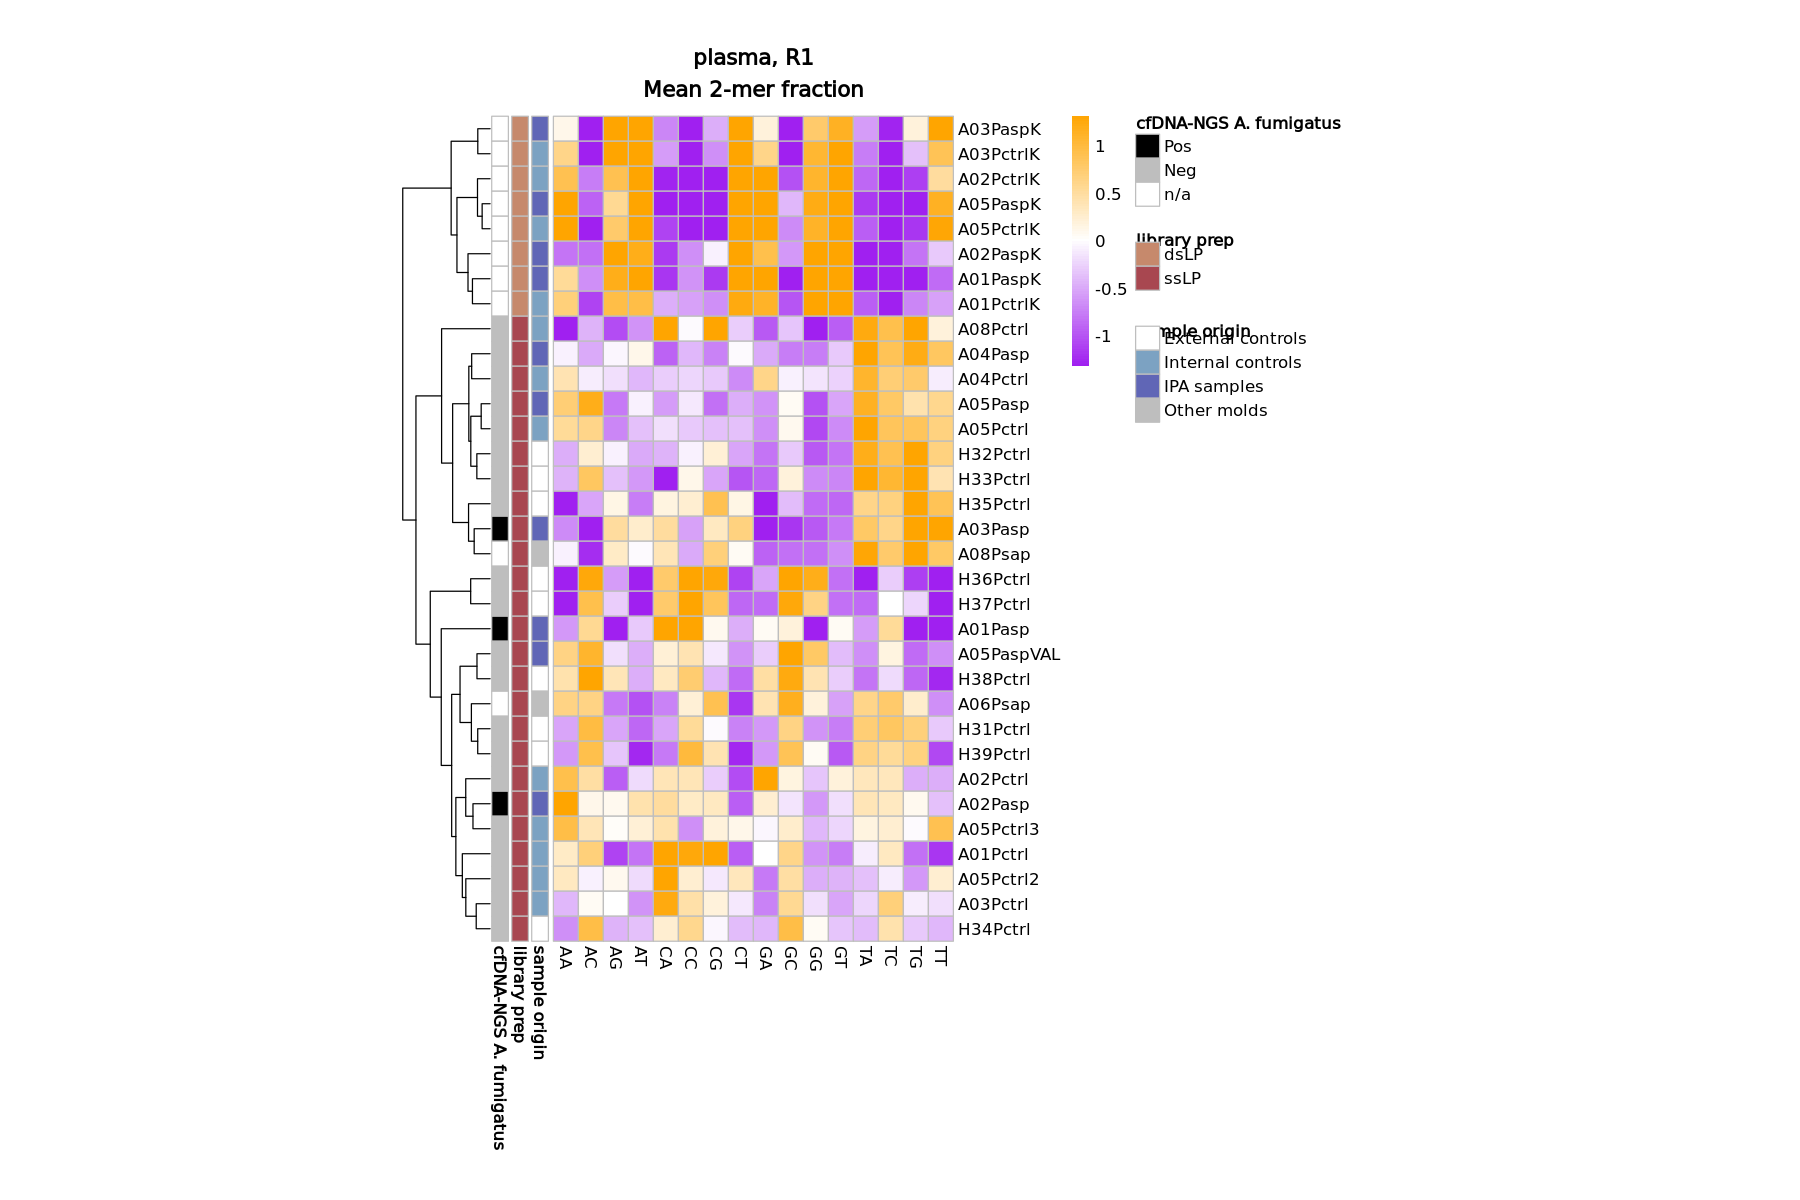

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls Internal controls       IPA samples       Other molds 
          "white"         "#7CA2C2"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



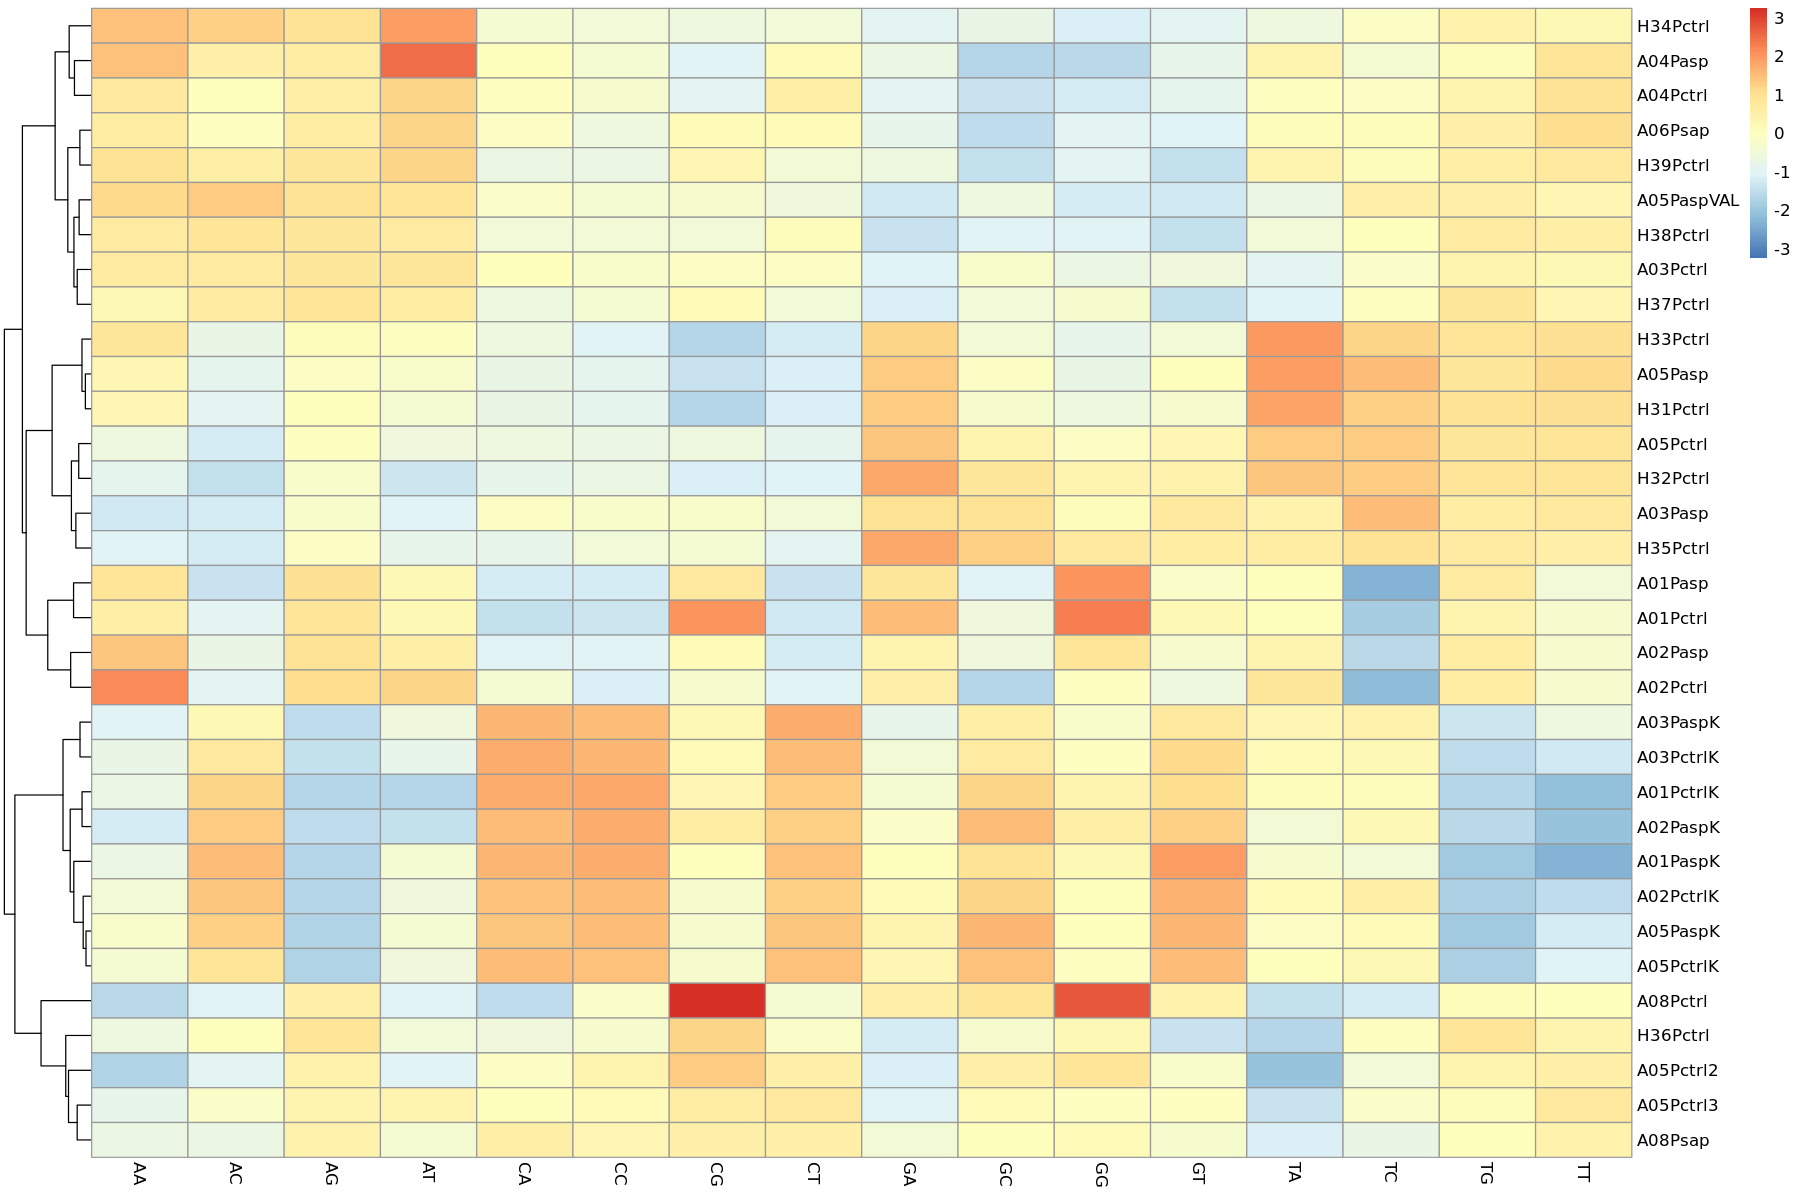

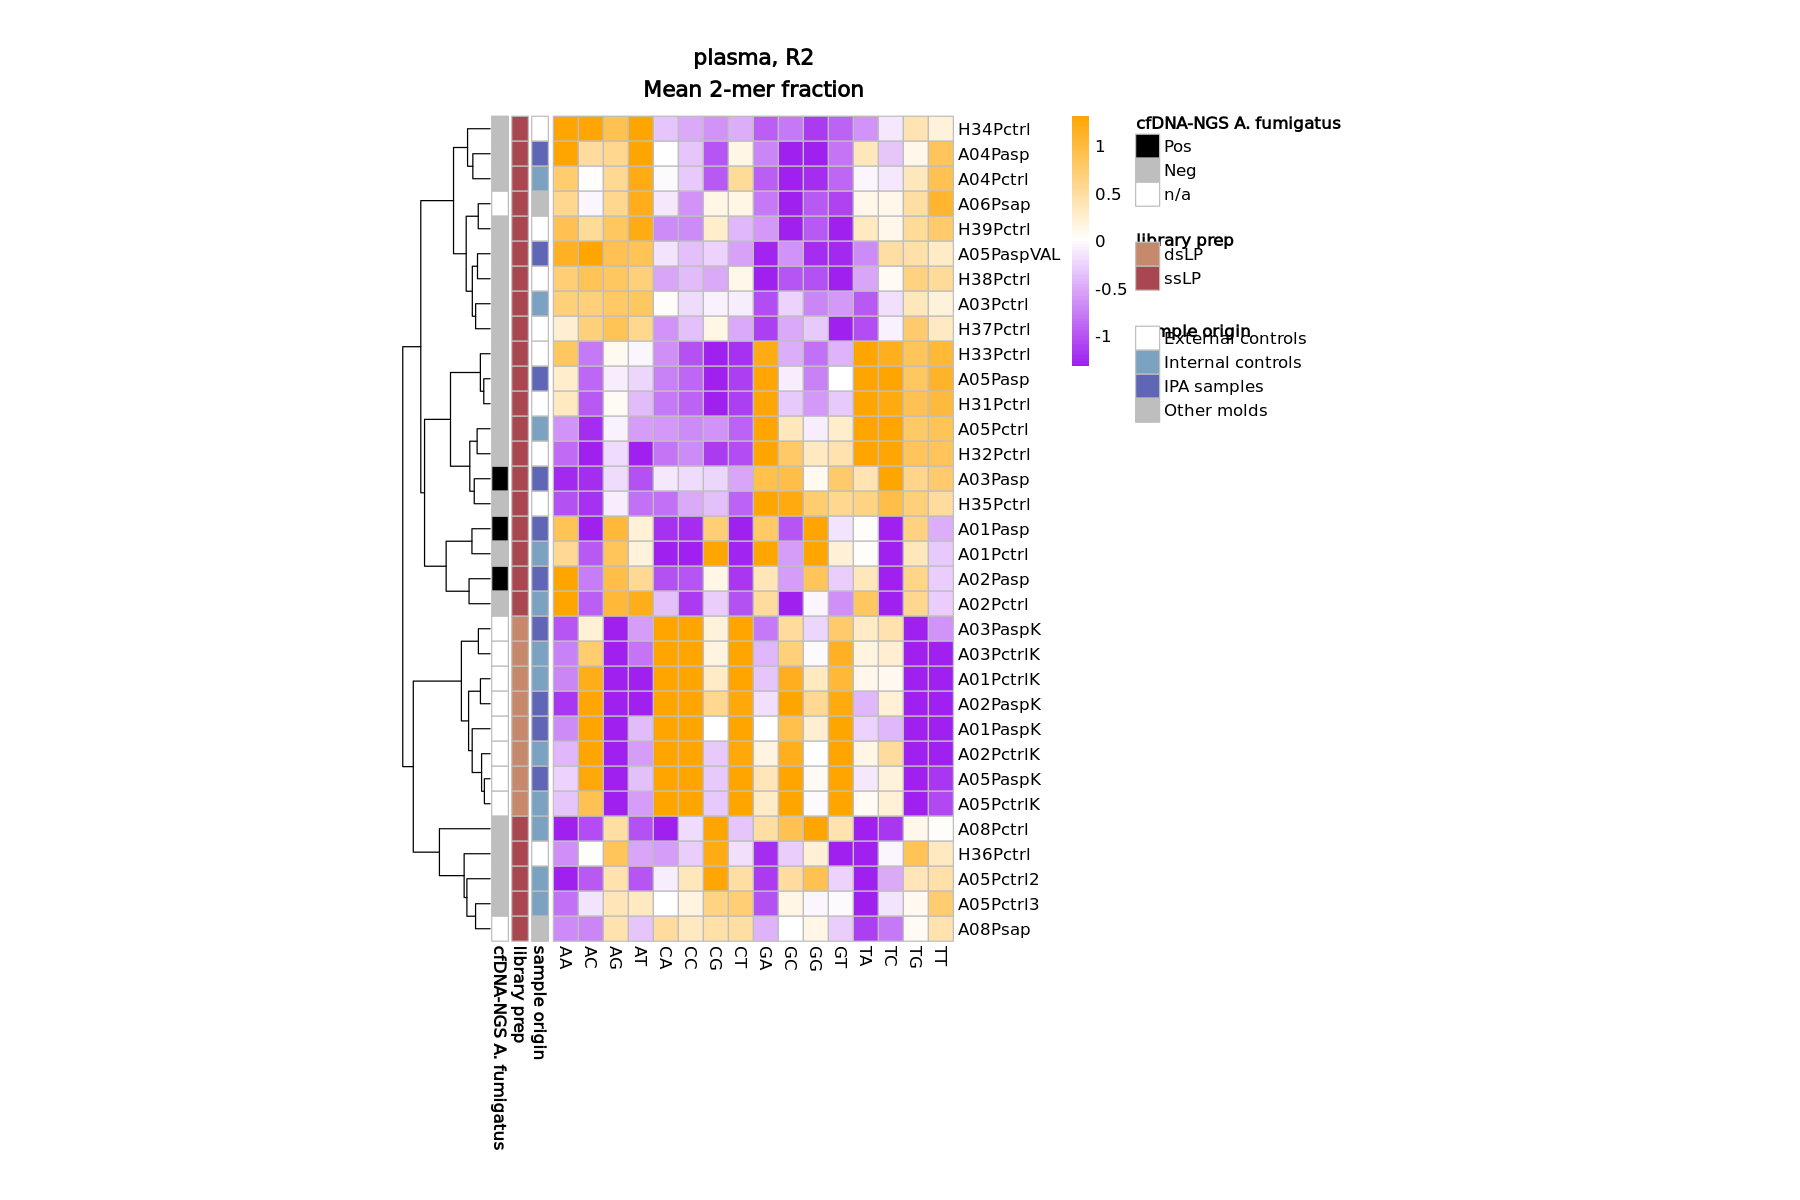

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls       IPA samples       Other molds 
          "white"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



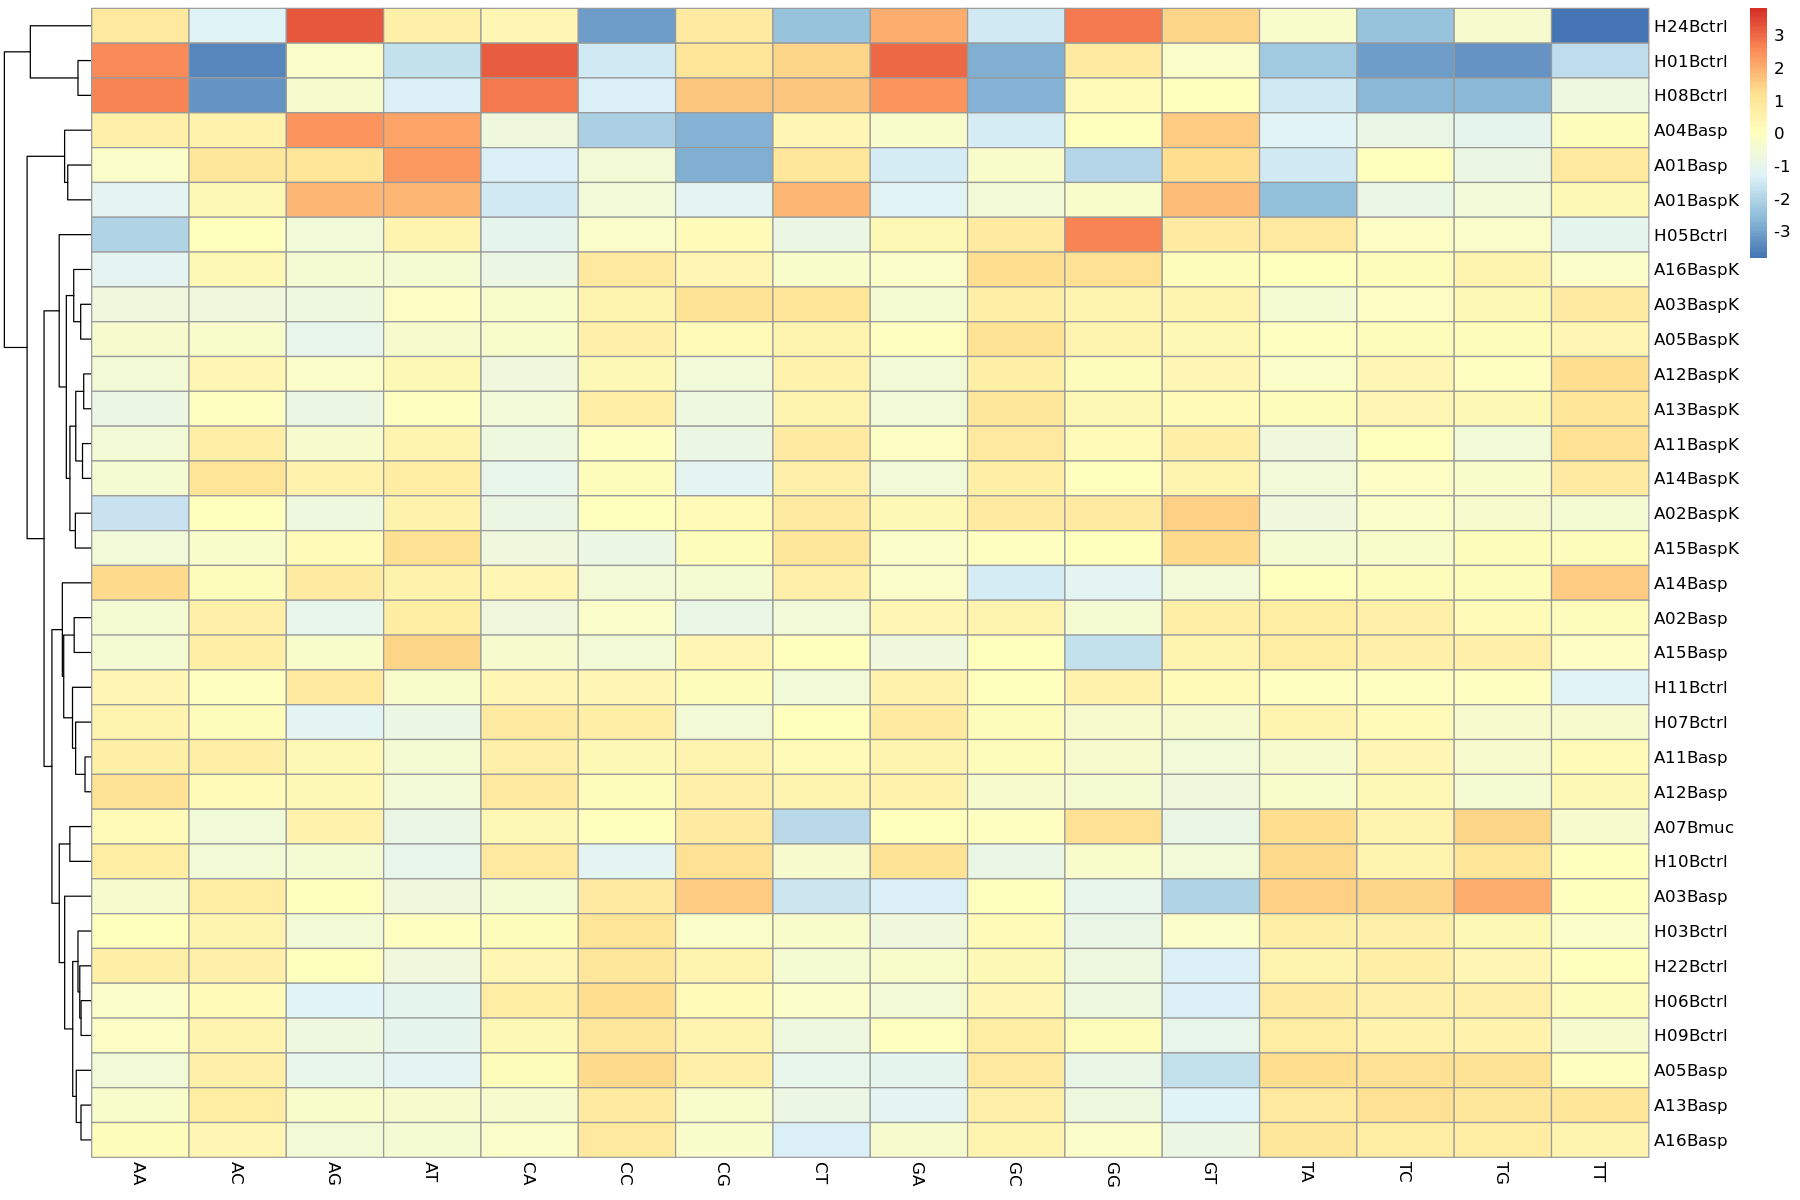

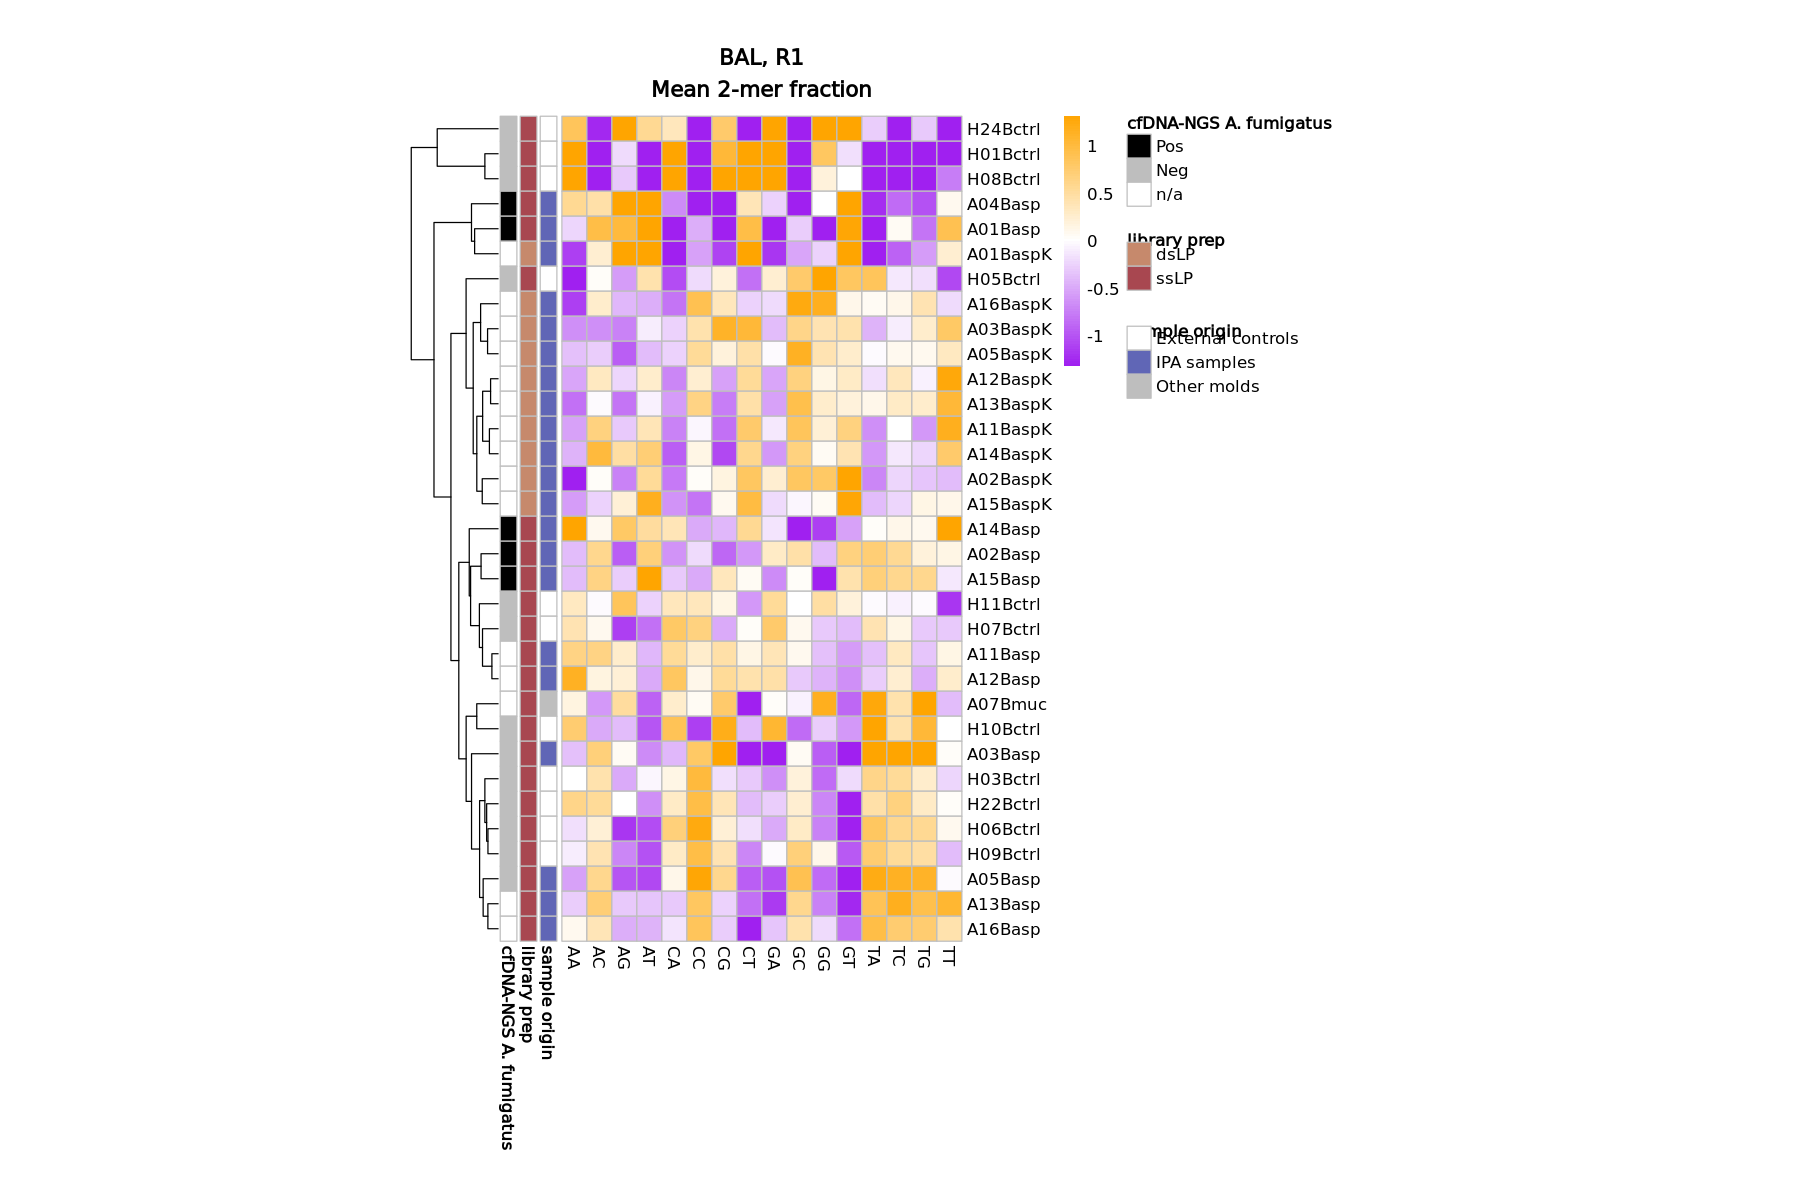

$`library prep`
       dsLP        ssLP 
"#C6896CFF" "#A84750FF" 

$`sample origin`
External controls       IPA samples       Other molds 
          "white"         "#6066B6"            "grey" 

$`cfDNA-NGS A. fumigatus`
    Pos     Neg     n/a 
"black"  "grey" "white" 



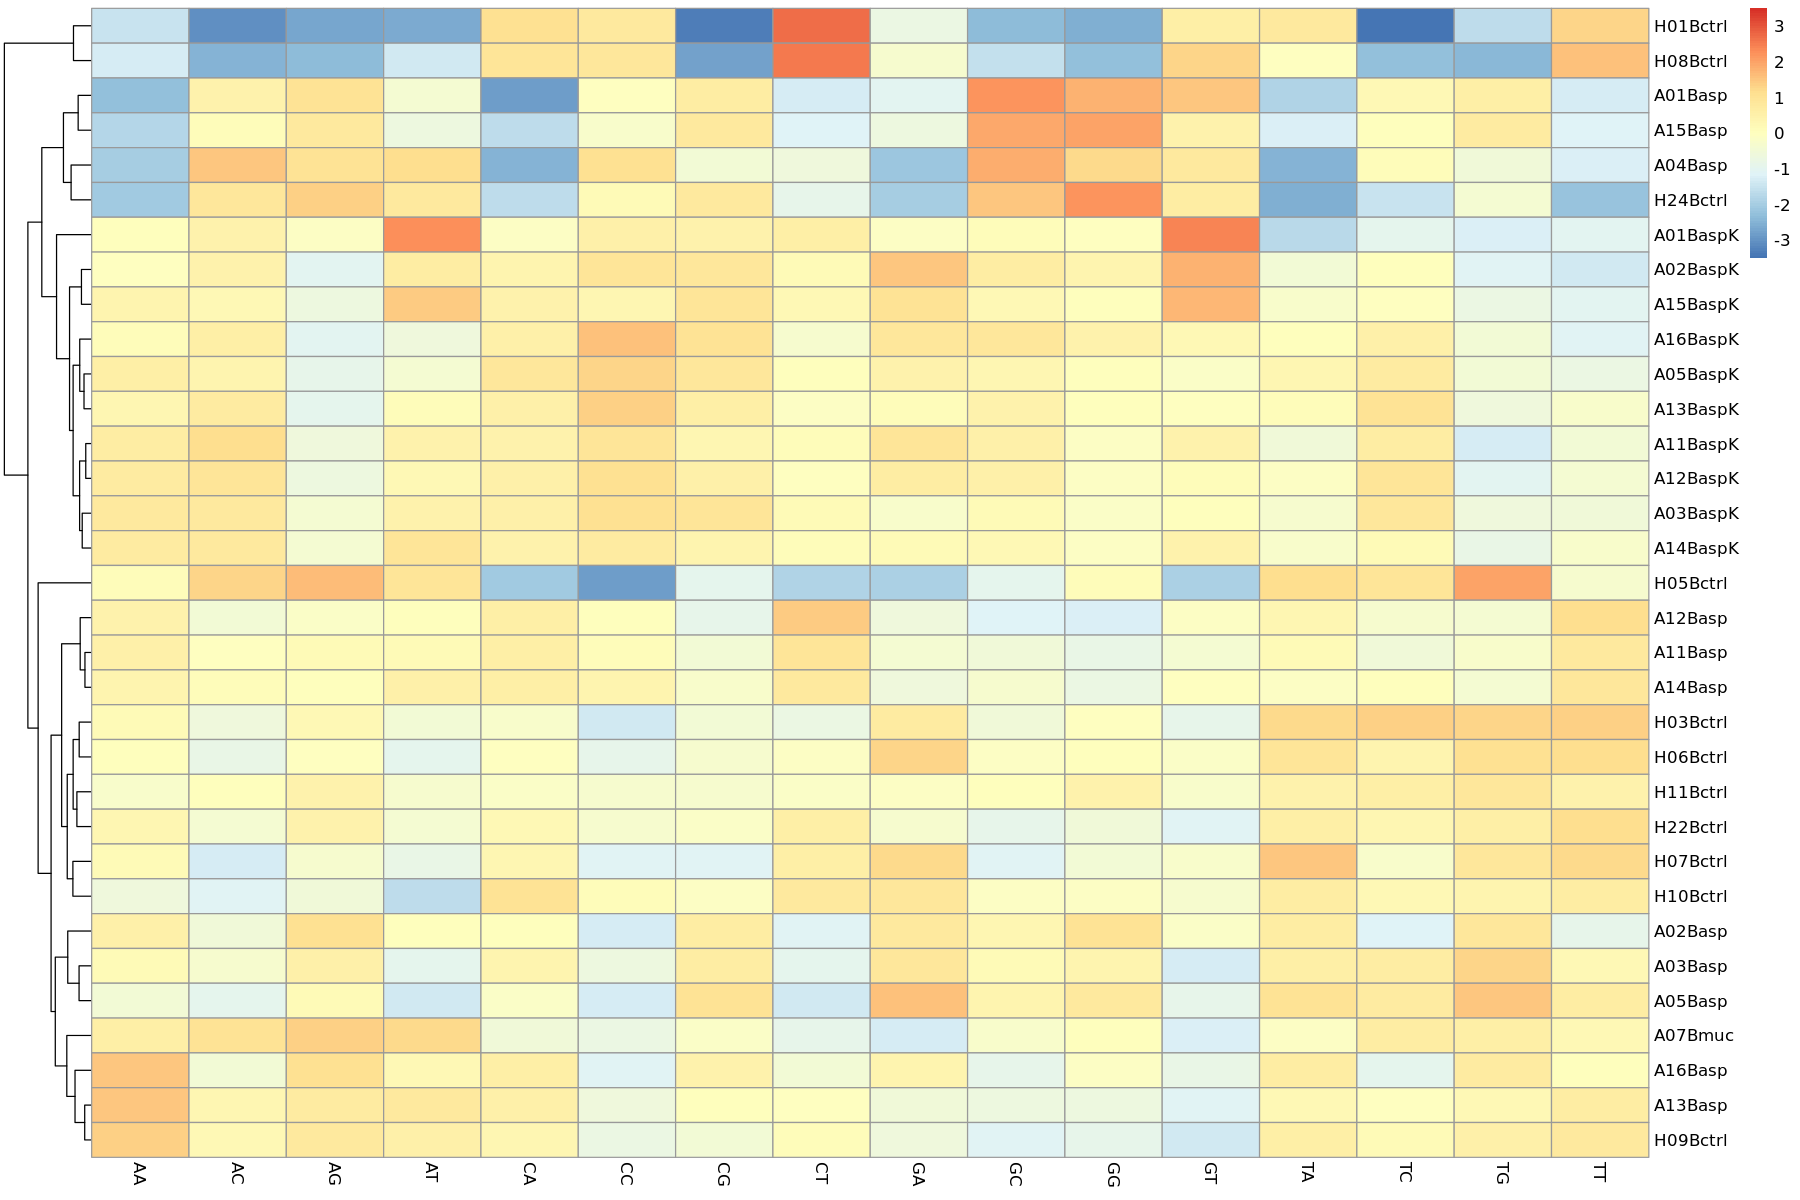

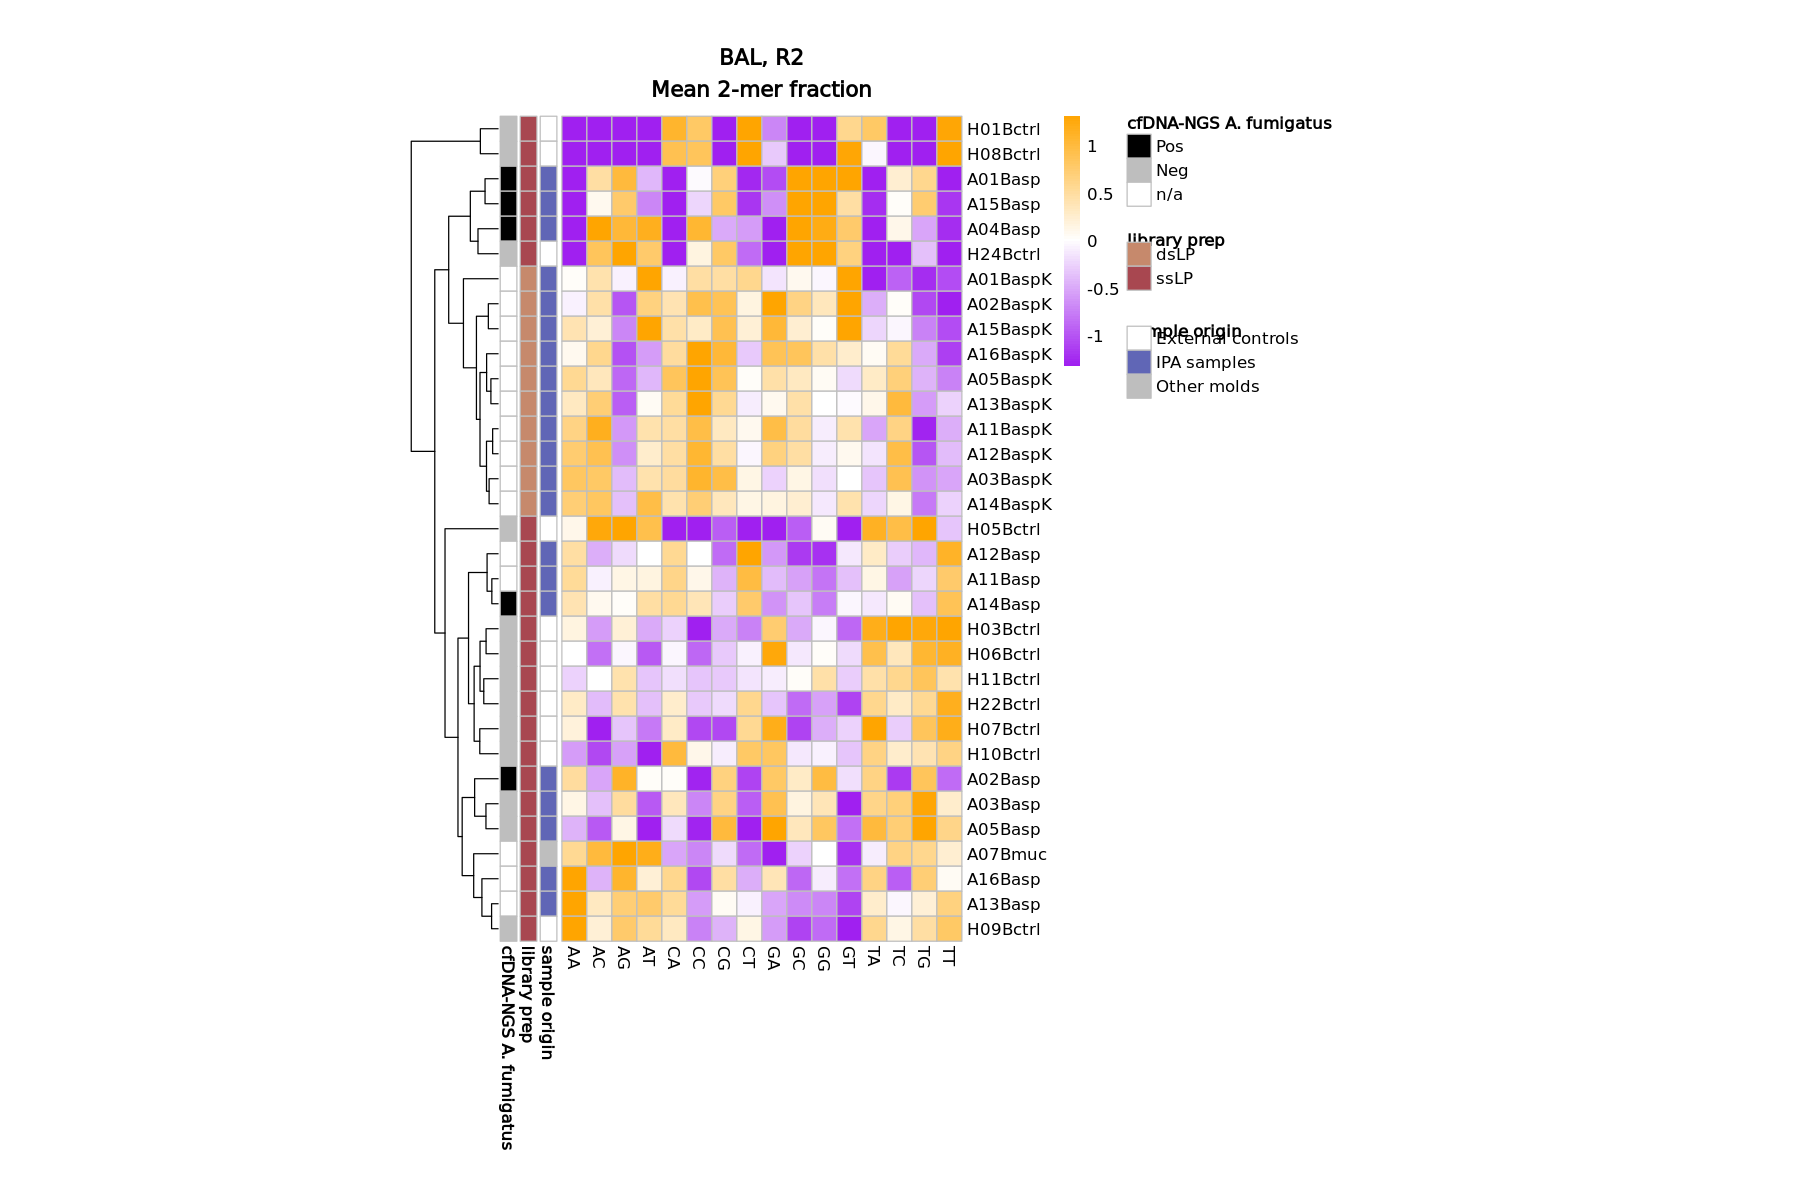

In [11]:
asp_fum_pos_samples <- c("A01Basp", "A02Basp", "A04Basp", "A14Basp", "A15Basp", 
                        "A01Pasp", "A02Pasp", "A03Pasp")

for (sel_fraction in c("fraction", "mean.binned.fraction")){
    if (sel_fraction == "fraction"){
        data_input <- host_nonMT_endXX
        add_title <- "\n2-mer fraction"
    }
    if (sel_fraction == "mean.binned.fraction"){
        data_input <- host_nonMT_endXX_binned
        add_title <- "\nMean 2-mer fraction"
    }
    
    data_input_norm <- data_input %>%
        mutate(log10_nsCount = log10(nsCount / 6.25)) %>% 
        filter(!is.na(EndXX) | is.na(read)) %>% 
        mutate(read_EndXX = paste0(read, "_", EndXX)) 

    color_palette <- colorRampPalette(c("purple", "white", "orange"))(101)
    max_val <- max(abs(data_input_norm$log10_nsCount), na.rm = TRUE)
    breaks <- seq(-max_val, max_val, length.out = 101)

    for(sel_sample in c("plasma", "BAL")){
        for (sel_read in c("R1", "R2")){
        # Transform data
        host_motifs_matrix_pre <- data_input_norm %>%
            filter(read == sel_read, sample == sel_sample) %>% 
            reshape2::dcast(sample_id ~ EndXX, value.var = "log10_nsCount")

        host_motifs_matrix <- as.matrix(host_motifs_matrix_pre[,-1])
        rownames(host_motifs_matrix) <- host_motifs_matrix_pre[,1]

        # Clustering
        clusters <- kmeans(t(host_motifs_matrix), centers = 2, nstart = 10)

        # Initial heatmap for ordering
        pre_host_nonMT_motif_heatmap <- pheatmap(host_motifs_matrix, 
                                                        cluster_rows = TRUE, cluster_cols = FALSE, scale = "column")

        row_order <- pre_host_nonMT_motif_heatmap$tree_row$order
        ordered_colnames <- rownames(host_motifs_matrix)[row_order]

        # Annotations
        row_annotations <- samples_metadata %>%
            filter(sample == sel_sample) %>%
            filter(sample_id %in% ordered_colnames) %>% 
            mutate(sample_id = factor(sample_id, levels = ordered_colnames)) %>%
            mutate(test = ifelse(origin == "IPA samples" & sample_id %in% asp_fum_pos_samples, yes = "Pos", 
                          ifelse(origin == "Other molds" | substr(sample_id,1,3) %in% c("A11", "A12", "A13", "A16") | 
                               type == "dsLP", yes = "n/a", no = "Neg"))) %>% 
            rename("sample origin" = origin, 
                  "library prep" = type, 
                  "cfDNA-NGS A. fumigatus" = test) %>% 
            select(sample_id, "sample origin", "library prep", "cfDNA-NGS A. fumigatus") %>%
            column_to_rownames(var = "sample_id")

        if (sel_sample == "BAL"){
            annotation_colors <- list(
                "library prep" = c("dsLP" = scales::alpha("#C6896C", 1), "ssLP" = scales::alpha("#A84750", 1)), 
                "sample origin" = c("External controls" = "white", "IPA samples" = "#6066B6", "Other molds" = "grey"), 
                "cfDNA-NGS A. fumigatus" = c("Pos" = "black", "Neg" = "grey", "n/a" = "white")
            )
        nr_cutree = 6}
        if (sel_sample == "plasma"){
            annotation_colors <- list(
                "library prep" = c("dsLP" = scales::alpha("#C6896C", 1), "ssLP" = scales::alpha("#A84750", 1)), 
                "sample origin" = c("External controls" = "white", "Internal controls" = "#7CA2C2", "IPA samples" = "#6066B6", "Other molds" = "grey"), 
                "cfDNA-NGS A. fumigatus" = c("Pos" = "black", "Neg" = "grey", "n/a" = "white")
            )
        nr_cutree = 6}
        annotation_colors %>% print()

        # Heatmap plot
        host_nonMT_motif_heatmap <- pheatmap(
            host_motifs_matrix, cluster_rows = TRUE, cluster_cols = FALSE,
            scale = "column", #cutree_rows = nr_cutree,
            color = color_palette, breaks = breaks, 
            annotation_row = row_annotations, annotation_colors = annotation_colors,
            fontsize_row = 10, fontsize_col = 10,
            cellwidth = 15, cellheight = 15,
            labels_row = NULL, labels_col = NULL,
            border_color = "grey",
            main = paste0(sel_sample, ", ", sel_read, add_title), 
            #clustering_distance_rows = "correlation",
            clustering_distance_rows = "euclidean"
        )

        # Plot dimensions
        options(repr.plot.width = 15, repr.plot.height = 10)

        # Save plots
        ggsave(filename = paste0("../../output_figures/host_nonMT_", sel_sample, "_motif_", sel_fraction, "_heatmap_", sel_read,".png"), 
               plot = host_nonMT_motif_heatmap, width = 10, height = 10)
        ggsave(filename = paste0("../../output_figures/host_nonMT_", sel_sample, "_motif_", sel_fraction, "_heatmap_", sel_read,".pdf"), 
               plot = host_nonMT_motif_heatmap, width = 10, height = 10)

        }
    }
}